# Table of contents
- [Introduction](#Introduction)
    - [Who are we?](#Who-are-we?)
    - [Why data science?](#Why-Data-Science?)
- [Project Subject Background](#Project-Subject-Background)
    - [Motivation](#Motivation)
    - [The problem](#The-Problem)
- [Reaserching the Twitter Bots World](#Reaserching-the-Twitter-Bots-World)
    - [What is a Bot? Which kind of bots are exist? What is a bot behavior?](#What-is-a-Bot?-Which-kind-of-bots-are-exist?-What-is-a-bot-behavior?)
- [Python packges on this project](#Python-packges-on-this-project)
- [Finding a Dataset](#Finding-a-Dataset)
- [Understanding the Dataset](#Understanding-the-Dataset)
- [Building Twitter Scraping Tool](#Building-Twitter-Scraping-Tool)
    - [Tweets Scraping](#Tweets-Scraping)
    - [Advanced Tweets Features Extraction](#Advanced-Tweets-Features-Extraction)
- [EDA](#EDA)
    - [Cleaning and Splitting Data](#Cleaning-and-Splitting-Data)
    - [Data Overview](#Data-Overview)
    - [Textual Features Analysis](#Textual-Features-Analysis)
        - [Catagorize users by locations in the world](#Catagorize-users-by-locations-in-the-world)
    - [Numeric Features Analysis](#Numeric-Features-Analysis)
        - [Analyzing number of tweets per day for bots](#Analyzing-number-of-tweets-per-day-for-bots)
        - [Distribution of Human VS Bots above numeric features](#Distribution-of-Human-VS-Bots-above-numeric-features)
        - [Correlations](#Correlations)
- [EDA - tweets from TwitterAPI](#EDA---tweets-from-TwitterAPI)
    - [HashTag Analysis](#HashTag-Analysis)
- [Follower and Following Analysis](#Follower-and-Following-Analysis)
    - [Reputation Analysis](#Reputation-Analysis)
    - [Users IDs networks by followers and following](#Users-IDs-networks-by-followers-and-following)
        - [Understanding the data](#Understanding-the-data)
        - [Using networkX for Analyzing a bot](#Using-networkX-for-Analyzing-a-bot)
        - [Dividing the graph to nodes by their account type](#Dividing-the-graph-to-nodes-by-their-account-type)
        - [Degree Analysis](#Degree-Analysis)
        - [Community Detection for bot](#Community-Detection-for-bot)
        - [Finding Cliques](#Finding-Cliques)
        - [Best partition By Louvain Community Detection Algorithm](#Best-partition-By-Louvain-Community-Detection-Algorithm)
- [EDA Summary](#EDA-Summary)
- [Classification](#Classification)
    - [Dimensionality reduction](#Dimensionality-reduction)
        - [Linear Dimensionality Reduction with PCA](#Linear-Dimensionality-Reduction-with-PCA)
        - [Trying K-Nearest Neighbours after PCA](#Trying-K-Nearest-Neighbours-after-PCA)
        - [Non-Linear Dimensionality Reduction with Manifold](#Non-Linear-Dimensionality-Reduction-with-Manifold)
    - [Train & Test Datasets](#Train-&-Test-Datasets)
    - [Standard Scaling](#Standard-Scaling)
- [Classification Algorithms](#Classification-Algorithms)
    - [1. Logistic Regression](#1.-Logistic-Regression)
    - [2. K-Nearest Neighbours (K-NN)](#2.-K-Nearest-Neighbours-(K-NN))
    - [3. SVC (Support Vector Classifier) with Linear Kernel](#3.-SVC-(Support-Vector-Classifier)-with-Linear-Kernel)
    - [4. Naive Bayes](#4.-Naive-Bayes)
    - [5. Decision Tree](#5.-Decision-Tree)
    - [6. Random Forest](#6.-Random-Forest)
- [Explaining the decision tree model with SHAP](#Explaining-the-decision-tree-model-with-SHAP)
- [Conclusion and further research](#Conclusion-and-further-research)


# Introduction

### Who are we?
Orly Sokolov - software developer at Google, working in the backend team of a new cloud product that allows companies to stream and migrate their databases to GCP (Google Cloud Platform).

Yulia Balanovsky - software developer in the field of Computer Vision at defense industry company.

This is our Data Science workshop (20936) project led by Dr. Idan Alter, as part of our last year of a Bs.c computer science at The Open University Of Israel.

### Why Data Science?
The're many different workshops available in the Open University towards the Computer Science degree, but in the world of non-stop growing data, where everything starts to digitalize- we both had the feeling that each and every one of us will need to know at least the basics of Data Science, as being able to analyze data efficiently and knowing how to cope with big amounts of information is becoming a more and more basic and a “must-have” skill in today’s world.

Just to get the sense of the growing data amounts in our world-
In 2020, on average- every human created at least 1.7 MB of data per second, that means we created 2.5 quintillion data bytes daily in 2020, and there are 18 zeros in a quintillion.
Based on how much data is already generated every day by humans through social media, video sharing, and communications, the number will surely increase and so in 2025- 463 exabytes of data will be generated each day.

And what is all this data? From our medical information, through pictures and memories, control systems in the fields of agriculture and transportation, measurement instruments located in Antarctica to monitor global warming, statistics collected from our cars while driving, from our smartphones while using a bunch of different apps, or from our smart watches while working out, and the list just goes on and on, increasing each and every minute.

It’s also important to understand that data is recorded and documented in many ways and places - Simple Docs or Sheets, Pictures, Videos, SQL and NoSQL Databases, either in the cloud or in a secret military base server.

Data is everywhere, it appears in many different ways and shapes and it’s scaling dramatically. The world goes towards taking advantage of this data, and in order to do so we need to know how to work with all the scales and kinds of data, we need to be able to efficiently collect, organize, analyze and measure it, and eventually learn and draw conclusions and hopefully use that to make our world a better and a smarter place.

# Project Subject Background

The subject we decided to do a research about is Twitter Bots, and more specifically - we want to find a good way to <b> Detect Twitter Bots </b> .
But before diving into declarations and other technical details, we'll explain why this subject interested us...

### Motivation
During winter of 2022, Russia invaded Ukraine and a war broke out between the two.
In 2022 war is not only physical but also psychological and cyber on land and at sea driven.

The ubiquity of social media in the conflict has been striking. Alongside the information wars being fought by the governments, militaries and authorities involved, and the reporting from accredited journalists, there is now almost unlimited potential for ordinary people caught up in events to share their own experiences. First-hand testimony and images of atrocities such as those in Bucha or Mariupol can appear on our social media feeds in real time, popping up incongruously between viral memes and cat videos.

Social media users do not just watch these events unfold in real time. They react to and interact with them. Gestures such as incorporating a Ukrainian flag into one’s username may be merely symbolic, but when users lobby politicians online, donate money, or even offer up their own homes to refugees, their engagement with the war begins to have real-world consequences.

Wartime information, however it is delivered, can affect decisions made by power-brokers and influence national – or global – public opinion. It may boost or lower the morale of troops, and of civilians caught up in the fighting. Social media advances on earlier technologies by radically increasing the speed of information delivery and the size of its audience, and by empowering individuals to share their own versions of events – for better or worse. As for the course of fighting itself, there is always more to the picture than information, however much of it is pumped out. The way a war unfolds may be swayed by the competence of leadership or troops, materiel, supply lines, the weather, or even luck. As generations of propagandists have already discovered, the facts on the ground may in the end disrupt even the most carefully constructed narrative.

<div>
    <img src="img/ukraine-russia-tweet2.jpeg" width="600px" margin-top="30px" margin-bottom="30px" />
</div>
<div style="text-align: left;">
    <img src="img/ukraine-russia-tweet3.jpeg" width="400px" float="left" margin-right="70px" />
    <img src="img/ukraine-russia-tweet1.jpeg" width="400px" />
</div>

### The Problem
**Twitter** is one of the most popular social media platforms where millions of daily active Twitter users using the platform. Twitter is also free to use and easy to access, which encourages individuals as well as organizations to view and publish contents of interests. So it's not so surprising that today Twitter is the most used-by government agencies, politicians and other significant and strong postioned characters social network. 

So back to that time when the war began- we opened Twitter accounts and started following the news of the battles. We faced an overwhelming amount of tweets, news, criticism, live updates from the war fields. And within all these, there was also an insane amount of fake news. We couldn’t really know what was right and what was wrong, we wanted to know the truth, we wanted to filter the tremendous number of posts and updates in order to get rid of all the fakes and lies, we were interested only in the reliable and trusted data, and it was just impossible to achieve.

<div>
    <img src="img/ukraine-russia-fake-tweets1.jpeg" style="width: 600px; margin-top: 30px; margin-bottom: 30px;"/>
</div>

Then we thought, how can we separate between trusted and untrusted information out there? Is it possible to identify real news? Who even publishes them?

From these thoughts came the idea for this project. We understood that Twitter is not just a simple innocent social network, but it’s much more sophisticated than that. 

Besides being used by genuine users, Twitter is home to an ample amount of automated programs, which are also known as "Twitter bots" and can do the same things as real human beings: send out tweets, follow other users, like and retweet postings by others. Some Twitter bots exploit Twitter features to pursue malicious goals such as election interference and extreme propaganda. Some of these Twitter bots are “Spam Bots” that use these abilities to engage in potentially deceptive, harmful or annoying activity - exactly like we encountered in the beginning of the war between Russia and Ukraine.

Twitter bots co-exist with human users on Twitter and they hide their automated nature by imitating genuine users. Since identifying bots in social media is crucial to preserving the integrity of the online discourse and these proposals are generally supervised, many research efforts have been devoted to the creation of relevant datasets.

<div>
<img src="img/the_riddler_bot.webp" style="width: 600px; margin-top: 30px; margin-bottom: 30px;"/>
</div>

So as we explained earlier, social media is a powerful tool connecting millions of people across the globe. These connections form the substrate that supports information dissemination, which ultimately affects the ideas, news, and opinions to which we are exposed. 

So we decided to seize this project opportunity and find <b style="font-size:140%;">How we can identify bots on Twitter?</b>

After searching the network about Twitter bots, it became that this problem is much bigger than we realized! 
Twitter bots are a problem in many aspects and fields, as even Elon Musk tweeted not such a long time ago:

<div>
<img src="img/Elon_Mask_Twitter.jpeg" style="width: 300px; margin-top: 30px; margin-bottom: 30px;"/>
</div>

# Reaserching the Twitter Bots World

### What is a Bot? Which kind of bots are exist? What is a bot behavior?

A Twitter bot is a type of bot software that controls a Twitter account via the Twitter API. The bot software may autonomously perform actions such as tweeting, re-tweeting, liking, following, unfollowing, or direct messaging other accounts. The automation of Twitter accounts is governed by a set of automation rules that outline proper and improper uses of automation.
In 2009, Twitter bots were estimated to create approximately 24% of tweets on Twitter.

Twitter bots, also known as zombies, are automated Twitter accounts controlled by bot software. While they are programmed to perform tasks that resemble those of everyday Twitter users — such as liking tweets and following other users — their purpose is to tweet and retweet content for specific goals on a large scale.

The purpose of the bot and its activity can be helpful or harmful.

Twitter bots can be used for helpful purposes, such as broadcasting important content like weather emergencies in real time, sharing informative content en masse, and generating automatic replies via direct messaging.

Twitter bots also can be designed for the malicious purposes of platform intimidation and manipulation — like spreading fake news campaigns, spamming, violating others’ privacy, and sock-puppeting.

You might wonder if one account can cause damage. It usually takes a larger effort. Twitter bots are often part of what’s known as a botnet. A botnet is a broad network of automated accounts that work together to appear legitimate, liking and following each other as if they were real. Worth noting: Bots also operate on other social media platforms.

## Python packges on this project

In [1]:
import os
import re
import copy
from random import sample

import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from wordcloud import WordCloud
from matplotlib import colors
from community import community_louvain
import matplotlib.cm as cm
from collections import defaultdict
import networkx as nx
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from sklearn import neighbors

from twitter_account_enrichment import *

# Finding a Dataset

After agreeing on the subject, we read a lot of articles and sources about Twitter Bots. Reviewed bots profiles and compared them to human ones, while trying to understand what actually characterizes the bots profiles.

We researched the network and learned about different possible ways to detect Twitter Bots.
One of the most significant sources we found was this reasearch: [TwiBot-20: A Comprehensive Twitter Bot Detection Benchmark](https://arxiv.org/abs/2106.13088) , which helped us decipher some parameters and to focus on data areas which might interest us and be relevant while trying to identify bots across Twitter.

We understood that there's enough content to work with and analyze in order to answer our research question, so we started to search for data. And more specifically - for "tagged" data. We looked for data sets of twitter accounts which were already checked and investigated and proven to be either a human or a bot. So that the dataset we searched for should contain this classification column for each account id.

We found many relevant datasets [here](https://botometer.osome.iu.edu/bot-repository/datasets.html), that contain genuine and fake Twitter accounts (=bots), manually annotated - starting from 2015!

If we'd take a look on `midterm-2018 [Description: Manually labeled human and bot accounts from 2018 US midterm elections. Labels and processed user objects.]`, this is how it looks:

In [4]:
pd.options.mode.chained_assignment = None

midterm_2018_path = "data_sets/original_data_sets/midterm-2018/midterm-2018.csv"
midterm_2018_df = pd.read_csv(midterm_2018_path)
midterm_2018_df

id account_type
0              2521260264          bot
1              2521267226          bot
2              2521271036          bot
3              2521301466          bot
4              2521307095          bot
...                   ...          ...
50533           327782659        human
50534           254709507        human
50535           412701607        human
50536          3009671708        human
50537  849647464093282305        human

[50538 rows x 2 columns]

### Understanding the Dataset

The dataset we saw above contains 2 columns:
1. <b>id:</b> Twitter account id (a unique twitter user identifier).
2. <b>account_type:</b> classification (bot/human). 

Just for getting the feeling of what is an account id in Twitter- we can reference directly to a user’s profile page through our browser with the following link: `https://twitter.com/intent/user?user_id={ACCOUNT_ID}`.

For example, let’s try it on the last account id from the dataset: https://twitter.com/intent/user?user_id=849647464093282305 , and this is what we get:
<div>
<img src="img/account849647464093282305.png" style="width: 400px; margin-top: 30px; margin-bottom: 30px;"/>
</div>

But as you probably already noticed, there’s a little problem with this dataset - it contains only a user id and its classification, there are no other feature columns! <b>What about all the features we want to base our study on?</b> Such as user name, or when a user was created, its following and followers counts…

There were also data sets that did contain some more details about each twitter account, but we didn’t want to be bound by these specific features that were provided in the datasets we found, we wanted the flexibility to extract details we are able to see when we browse the profile pages of each and one of the users, but in an automatic and efficient way, as browsing and collecting details manually for each twitter account sounds pretty unscalable.

As you already know what bots are - you probably remember that behind the scenes, these are automatic scripts running- and these scripts use the Twitter API for developers, which is also the solution for our features problem!

Using [Twitter API](https://developer.twitter.com/en/products/twitter-api) we enriched our data set. We started from getting basic details about users based only on their account ids. We used [Users lookup endpoint](https://developer.twitter.com/en/docs/twitter-api/users/lookup/api-reference/get-users-id) which enables us to get details for 100 twitter account ids with a single GET http request.

The properties that the API can provide on a single user and their explanation can be found [here](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user).

After requesting details for the first 5 bots account ids in the `midterm-2018` dataset, we realized something interesting. All of these 5 accounts have been suspended:

In [5]:
users_lookup_params = {
        "user.fields": "id,username,created_at,description,location,pinned_tweet_id,protected,public_metrics,"
                       "verified,withheld"
    }
users_lookup_url = f"https://api.twitter.com/2/users?ids=2521260264,2521267226,2521271036,2521301466,2521307095"

res = requests.request("GET", users_lookup_url, headers=create_auth_headers(), params=users_lookup_params)
res.json()

{'errors': [{'parameter': 'ids',
   'resource_id': '2521260264',
   'value': '2521260264',
   'detail': 'User has been suspended: [2521260264].',
   'title': 'Forbidden',
   'resource_type': 'user',
   'type': 'https://api.twitter.com/2/problems/resource-not-found'},
  {'parameter': 'ids',
   'resource_id': '2521267226',
   'value': '2521267226',
   'detail': 'User has been suspended: [2521267226].',
   'title': 'Forbidden',
   'resource_type': 'user',
   'type': 'https://api.twitter.com/2/problems/resource-not-found'},
  {'parameter': 'ids',
   'resource_id': '2521271036',
   'value': '2521271036',
   'detail': 'User has been suspended: [2521271036].',
   'title': 'Forbidden',
   'resource_type': 'user',
   'type': 'https://api.twitter.com/2/problems/resource-not-found'},
  {'parameter': 'ids',
   'resource_id': '2521301466',
   'value': '2521301466',
   'detail': 'User has been suspended: [2521301466].',
   'title': 'Forbidden',
   'resource_type': 'user',
   'type': 'https://api.twi

This brought us to the conclusion that we need a newer dataset and so we found the following [Twitter Human-Bots Dataset from Kaggle](https://www.kaggle.com/datasets/danieltreiman/twitter-human-bots-dataset) .

This dataset was recently (April2022) updated, and besides the user id and its account_type columns, it also contains many other details - 21 columns that potentially represent features we can learn from such as:
1. user created time
2. user screen name
2. user description
3. favourites count
4. followers count
5. tweets count

And more...

# Building Twitter Scraping Tool

After verifying that the dataset we found in Kaggle has existing twitter accounts, we decided to use Twitter API to enrich our data with potential features for separating between human and bots users. 

As a first step, we aggregated all potential features that we suspected and thought could be relevant, based on our background reading and common-sense. These were all the ideas we thought about:
1. created_at: time user was created 
2. user followers: count + ids
3. user following: count + ids
4. user location: country / timezone?
5. tweets: content, counts, times, etc.
6. likes
7. number of likes vs number of tweets
8. source of tweets: mobile / desktop
9. whether a user tweets in periodic and regular timing
    - tweets every equal time
    - very small gaps between tweets
10. same wording between tweets
11. whether the tweet content contains known spam
12. IP correlation: the geographical location of Twitter accounts.
13. automation: when an account tweets short replies that appear automated.
14. content similarity: when the same content is tweeted at the same time.
15. account creation: Twitter bots with recent creation dates.
16. account description: when an account looks automated because its username contains numbers. Also, it appears anonymous in the absence of a photo, biography, or profile description.
17. account activity: when a bot follows a lot of accounts but does not have many followers, and it’s retweeting and tweeting content faster than a human could.

From all of these ideas, we decided to start from the tweets related data. 

Twitter API provides the [Tweets Lookup endpoint](https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets) which we used for getting the latest 10 tweets details of each user id from our original Kaggle dataset. 

The properties that the API can provide on a single tweet and their explanation can be found [here](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet).


### Tweets Scraping
So we created a wrapped scraping tool for Twitter’s API, adjusted for our needs. 

We started from creating a [utilities functions file](./twitter_account_enrichment.py) which contains many functions that handle and encapsulate the authorization process, HTTP requests, skipping suspended users instead of failing the whole flow, organizing the responses and many other overheads we wanted to solve and use as a black-box.

Then, we could actually create the new datasets with the remaining features we were interested in. We ran the data pulling flows from a separate Jupyter notebook - [create csvs gradually notebook](./create_csvs_gradually.ipynb), and we ran it in chunks, as Twitter API has [rate limitations](https://developer.twitter.com/en/docs/twitter-api/rate-limits) that prevented us from querying the whole list of account ids at once. So we managed a state file and according to this file we knew where we stopped in the account ids list, which is actually the `id` column from the Kaggle dataset.

You’ll find 4 sections in this notebook:
1. Followers Enrichment
2. Following Enrichment
3. Tweets Enrichment
4. User Details Enrichment

We didn’t use them all, but we made and explored all these API offerings in different scales of querying and we liked the fact that we’ll have the opportunity to query all this potentially relevant information in more advanced stages of our research.

Each chunk was saved in a separate file. And as our dataset has 37438 rows/user ids, and each tweets lookup chunk got around 1200 users’ 10 latest tweets, we had around 31 chunks == 31 files:

In [2]:
twitter_human_bots_dataset_files = os.listdir("twitter_human_bots_dataset")
tweets_files = list(filter(lambda fn: fn.startswith("tweets16"), twitter_human_bots_dataset_files))
len(tweets_files), tweets_files

(10,
 ['tweets1651652762.csv',
  'tweets1651654376.csv',
  'tweets1651661959.csv',
  'tweets1651662905.csv',
  'tweets1651664867.csv',
  'tweets1651665687.csv',
  'tweets1651667363.csv',
  'tweets1651668054.csv',
  'tweets1651668899.csv',
  'tweets1651669069.csv'])

After that, we merged all the tweets csvs to one unite Dataframe using [merge csvs notebook](./merge_csvs.ipynb) ,
and saved it as [tweets140522.csv](./twitter_human_bots_dataset/tweets140522.csv) .

So now we have another dataset and more feratures to explore !

### Advanced Tweets Features Extraction
There were some features we were interested in that we couldn't get directly from Twitter's API, but we needed to calculate them based on the data we pulled and aggregated.

In the following section we calculated for each user:
- Whether or not the user's tweets post timings' have regular intervals (with a difference of max 10 minutes)
- Counter of intervals between 2 following tweets that are smaller or equal than a minute

These are based only on the latest 10 tweets of each user we collected earlier, although the user might have more than 10 tweets.

In the follwing cell, after calculating these features and storing them in a dataframe called `posts_created_at_calcs_df` , we joined it with the original users dataset from Kaggle based on account id as a key, and then saved it to a new csv file which is now an extended version of the original twitter_human_bot_dataset.

In [3]:
twitter_human_bots_dataset_path = "twitter_human_bots_dataset/twitter_human_bots_dataset.csv"
tweets_dataset_path = "twitter_human_bots_dataset/tweets140522.csv"

CREATED_AT_TIME_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
TEN_MINUTES_IN_SEC = 10*60
MINUTE_IN_SEC = 60
ACCOUNT_ID_COL = 'id'
POSTS_TIMES_COL = 'posts_times'
POSTS_DELTAS_COL = 'posts_deltas'
POSTS_HAVE_CONSTANT_DELTAS_COL = 'posts_constant_deltas'
LESS_THAN_1MIN_DELTAS_COL = 'less_than_one_min_deltas_count'

twitter_human_bots_dataset = pd.read_csv(twitter_human_bots_dataset_path, index_col=0)
tweets_dataset = pd.read_csv(tweets_dataset_path, index_col=0)

posts_created_at_calcs_df = pd.DataFrame(columns=[ACCOUNT_ID_COL, POSTS_HAVE_CONSTANT_DELTAS_COL, 
                                                  LESS_THAN_1MIN_DELTAS_COL])

for user_id in twitter_human_bots_dataset.id:
    current_user_tweets = tweets_dataset.loc[tweets_dataset["account_id"]==user_id]
    current_user_tweets_ca_str = current_user_tweets.created_at.dropna().astype(str).tolist()
    current_user_tweets_ca = [datetime.strptime(tweet_created_at, CREATED_AT_TIME_FORMAT) 
                              for tweet_created_at in current_user_tweets_ca_str]
    
    current_user_deltas = []
    for i in range(len(current_user_tweets_ca)-1):
        current_user_deltas.append(current_user_tweets_ca[i]-current_user_tweets_ca[i+1])
        
    # We want to check if a user posts tweets every constant time (means using some automated script probably)
    # We decided to measure this constant time by the creation time deltas variation. 
    # If all posts are with deltas with a difference of max 10 minutes
    total_seconds_deltas = [d.total_seconds() for d in current_user_deltas]
    if len(total_seconds_deltas) > 2:
        user_deltas_avg = sum(total_seconds_deltas) / len(total_seconds_deltas)
        posts_have_constant_deltas = all([abs(tsd-user_deltas_avg)<=TEN_MINUTES_IN_SEC 
                                          for tsd in total_seconds_deltas])
    else:
        posts_have_constant_deltas = None
    
    # We want to check if a user posts tweets in a difference of less than a minute.
    # This data will be represented simply by the count of deltas <= 1min
    
    less_than_1min_deltas = len([t for t in total_seconds_deltas if t<=MINUTE_IN_SEC])
    
    
    posts_created_at_calcs_df = posts_created_at_calcs_df.append(
        {ACCOUNT_ID_COL: user_id,
         POSTS_HAVE_CONSTANT_DELTAS_COL: posts_have_constant_deltas,
         LESS_THAN_1MIN_DELTAS_COL: less_than_1min_deltas}, ignore_index=True)

In [4]:
merged_df = pd.merge(twitter_human_bots_dataset, posts_created_at_calcs_df, how="left", 
                     on=["id"], validate="one_to_one")
merged_df.to_csv(f"twitter_human_bots_dataset/users_dataset{int(datetime.now().timestamp())}.csv", index=True)

So now we're ready to recap the data collection stage that we just finished and sum up the findings till this point of our project...

First, we learned about Twitter and what influence this platform might have on our world. Then, we studied the Twitter Bots world through academic research, articles and also by manually accessing confirmed bots profiles and reading tweets about this major problem in Twitter. After understanding what these bots are and why we are so interested in identifying Twitter profiles that are not genuine, we started with the actual data collection. 

We found many different datasets of Twitter profiles that had been checked and classified to human/bot account type. We then learned about Twitter API and learned how to use it - starting from opening Twitter Developer accounts, getting tokens and pass the authentication barrier, to the stage of requesting different data endpoints, including users data, tweets, following and followers data, and enriching the account IDs from our dataset, while dealing with the requests limits PER 15-minutes and aggregating all the data we collected by merging the dataframes.

After enriching the original users we had from Kaggle’s dataset, we also calculated and added some more features we thought could be relevant and help us on bots identifying, based on our previous reading and research.

Now we can start exploratory data analysis on the following final 3 datasets:

1. users_dataset.csv
2. tweets140522.csv
3. followers040522.csv 

# EDA

In [5]:
USERS_DATASET_PATH = 'twitter_human_bots_dataset/users_dataset.csv'

Firstly, we'll get more familiar with the original dataset from Kaggle which contains data of Twitter users and their classification between 2 categories: Human / Bot . We'd like to perform some basic analysis and initial observations, and then maybe some preprocessing and organizing that will help us to work with this data later.

So let's start and load our enriched dataset (which is actually the original dataset from Kaggle with the additional enriched columns from the tweets data that we created in the previous step) - [users_dataset.csv](./twitter_human_bots_dataset/users_dataset.csv) - as a pandas dataframe!

In [6]:
users_df = pd.read_csv(USERS_DATASET_PATH, index_col=0)
users_df.head()

created_at  default_profile  default_profile_image  \
0  2009-07-04 22:41:51            False                  False   
1  2010-01-17 22:54:19            False                  False   
2  2012-03-01 06:05:32            False                  False   
3  2009-09-01 04:52:30            False                  False   
4  2010-01-27 17:17:23            False                  False   

                                         description  favourites_count  \
0                                                NaN              5007   
1  Television producer. Emmy Award winner. Disney...              1038   
2                                                NaN              2257   
3                                                NaN              6407   
4  Productor de Televisión - Embajador de @Tienda...             20866   

   followers_count  friends_count  geo_enabled         id lang  ...  \
0              102            168        False   53779179  NaN  ...   
1               60            128        False  105916557   en  ...   
2              599            449         True  509788597  NaN  ...   
3              116            334         True   70601327  NaN  ...   
4            74448             18         True  108999927   es  ...   

  statuses_count verified average_tweets_per_day account_age_days  \
0           3974    False                  0.978             4063   
1            259    False                  0.067             3866   
2          13627    False                  4.406             3093   
3           4432    False                  1.107             4005   
4          15870     True                  4.116             3856   

   account_type                                 profile_image_path  \
0           bot                                                NaN   
1         human  profile_images/4691ae58668d932bb7e7af22141aecf...   
2         human                                                NaN   
3         human  profile_images/d1da9220e4aa376dff03b6f12765171...   
4         human  profile_images/c65bf625b066ef5f29e14cfcf1ee91f...   

                       profile_background_image_path  split  \
0                                                NaN      0   
1  profile_images/4691ae58668d932bb7e7af22141aecf...      0   
2                                                NaN      0   
3  profile_images/d1da9220e4aa376dff03b6f12765171...      0   
4  profile_images/c65bf625b066ef5f29e14cfcf1ee91f...      0   

  posts_constant_deltas less_than_one_min_deltas_count  
0                 False                            1.0  
1                 False                            1.0  
2                 False                            0.0  
3                 False                            0.0  
4                 False                            0.0  

[5 rows x 24 columns]

In [7]:
users_cols = users_df.columns
print(users_cols)

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type',
       'profile_image_path', 'profile_background_image_path', 'split',
       'posts_constant_deltas', 'less_than_one_min_deltas_count'],
      dtype='object')


#### Cleaning and Splitting Data
Now we can see that in each row we have the Twitter account identifier (`id`) and the account type (`account_type`) - these 2 columns can't be features so we can get rid of them when creating the separated features dataset.
Another columns we wanted to get rid of, are columns we weren't sure what was their meaning or we just understood they won't be relevant as features, at least at the beginning: 
1. `default_profile`
2. `default_profile_image`
3. `profile_background_image_url` 
4. `profile_image_url` 
5. `profile_image_path`
6. `profile_background_image_path`
7. `split`

so we decided to remove them from the features dataframe.

We also wanted to rename few columns to more indicative twitter-oriented language names:
1. `friends_count` -> `following_count`
2. `statuses_count` -> `tweets_count`

In [8]:
classes = users_df['account_type']                
account_ids = users_df['id']                
features = users_df.drop(['id','account_type', 'default_profile', 'default_profile_image', 
                          'profile_background_image_url', 'profile_image_url', 'profile_image_path',
                          'profile_background_image_path', 'split'], axis = 1)
features = features.rename(columns={"friends_count": "following_count", "statuses_count": "tweets_count"})
features.head()

created_at                                        description  \
0  2009-07-04 22:41:51                                                NaN   
1  2010-01-17 22:54:19  Television producer. Emmy Award winner. Disney...   
2  2012-03-01 06:05:32                                                NaN   
3  2009-09-01 04:52:30                                                NaN   
4  2010-01-27 17:17:23  Productor de Televisión - Embajador de @Tienda...   

   favourites_count  followers_count  following_count  geo_enabled lang  \
0              5007              102              168        False  NaN   
1              1038               60              128        False   en   
2              2257              599              449         True  NaN   
3              6407              116              334         True  NaN   
4             20866            74448               18         True   es   

          location      screen_name  tweets_count  verified  \
0  Maringá, Brasil     paty_castroo          3974     False   
1          Atlanta        CBirckner           259     False   
2          unknown          amf_jay         13627     False   
3     Brooklyn, NY       SaraCavolo          4432     False   
4        Miami, FL  DavidHenaoModel         15870      True   

   average_tweets_per_day  account_age_days posts_constant_deltas  \
0                   0.978              4063                 False   
1                   0.067              3866                 False   
2                   4.406              3093                 False   
3                   1.107              4005                 False   
4                   4.116              3856                 False   

   less_than_one_min_deltas_count  
0                             1.0  
1                             1.0  
2                             0.0  
3                             0.0  
4                             0.0

So from now on, we'll use only the classes and features, instead of users_df itself.

### Data Overview
Before we start, let's check what is the size of our Twitter users dataset from Kaggle and the provided features, and also describe the features to get a sense of magnitudes.

In [9]:
print(f"Rows Count: {features.shape[0]}")
print(f"Features Count: {features.shape[1]}")

Rows Count: 37438
Features Count: 15


We'd like to execute the `describe` function in order to see some generic mathematical analysis of the features. 
The `describe` function analyzes only numeric and object series, while we also have datetime, boolean and textual columns. So first we'll convert the boolean feature columns into numeric ones, as this is a simple change we can perform easily.

But later on, when anaylzing and searching for correlations we'll tackle these types differences and see how we handle them.

In [10]:
numeric_features_names = ["favourites_count", "followers_count", "following_count", "tweets_count", 
                          "average_tweets_per_day", "account_age_days", "less_than_one_min_deltas_count"]
boolean_features_names = ["geo_enabled", "verified", "posts_constant_deltas"]

for boolean_feature_name in boolean_features_names:
    features[boolean_feature_name] = features[boolean_feature_name].replace({True: 1, False: 0})

numeric_features_names.extend(boolean_features_names)

In [11]:
features.describe()

favourites_count  followers_count  following_count   geo_enabled  \
count      37438.000000     3.743800e+04     3.743800e+04  37438.000000   
mean       12302.062183     3.703098e+05     4.445925e+03      0.456141   
std        33923.650237     2.470829e+06     4.954520e+04      0.498079   
min            0.000000     0.000000e+00     0.000000e+00      0.000000   
25%          362.000000     3.500000e+01     3.700000e+01      0.000000   
50%         2066.000000     3.650000e+02     2.960000e+02      0.000000   
75%         8879.000000     8.440250e+03     8.930000e+02      1.000000   
max       885123.000000     1.216415e+08     4.343060e+06      1.000000   

       tweets_count      verified  average_tweets_per_day  account_age_days  \
count  3.743800e+04  37438.000000            37438.000000      37438.000000   
mean   2.107339e+04      0.201693                6.891668       3022.128052   
std    6.732977e+04      0.401270               24.580116       1013.695870   
min    0.000000e+00      0.000000                0.000000        483.000000   
25%    1.336250e+03      0.000000                0.495000       2316.250000   
50%    4.209000e+03      0.000000                1.488000       3219.000000   
75%    1.715375e+04      0.000000                5.528000       3888.000000   
max    2.771910e+06      1.000000             1269.055000       5158.000000   

       posts_constant_deltas  less_than_one_min_deltas_count  
count           33327.000000                    37178.000000  
mean                0.052300                        0.935042  
std                 0.222635                        1.655613  
min                 0.000000                        0.000000  
25%                 0.000000                        0.000000  
50%                 0.000000                        0.000000  
75%                 0.000000                        1.000000  
max                 1.000000                       18.000000

There's an important thing we need to make sure we notice in the above table - and this thing is that the ranges of the numeric features varies, so if we want to compare between 2 numeric features on the same axis plot, we’ll first need to normalize the features’ values. 

But first, let's start with a simple `countplot`, to see the data distribution between Bot and Human Twitter users in our dataset.

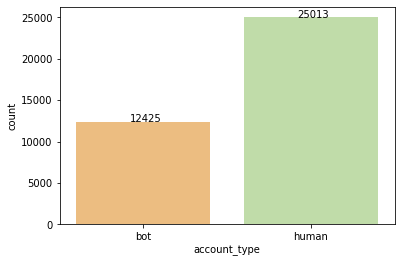

In [12]:
ax = sns.countplot(x=classes,label="count", palette="Spectral")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+3))

### Textual Features Analysis

#### Catagorize users by locations in the world
There are 2 potential features in this context. First one is of course `location` and the second one is `lang` which is a short for the language associated with the user. 

Firstly, we'll check how many missing data we have in these columns by counting the missing values rows (Nans):

In [13]:
features[["lang", "location"]].isna().sum()

lang        7957
location       3
dtype: int64

Looks like we have many lang values missing but we still might use this column as a feature for those rows that have some data there.

Let’s check the unique values for each of these features.

In [14]:
unique_langs = features.lang.dropna().unique()
print(f"There're {unique_langs.size} unique langs in our Twitter users dataset: {unique_langs}")

There're 48 unique langs in our Twitter users dataset: ['en' 'es' 'tr' 'ar' 'no' 'ca' 'ro' 'pt' 'da' 'bg' 'fr' 'ja' 'sw' 'sv'
 'tl' 'fi' 'it' 'id' 'cy' 'de' 'sk' 'ru' 'so' 'ko' 'nl' 'af' 'hr' 'et'
 'vi' 'pl' 'sq' 'fa' 'hu' 'uk' 'ur' 'th' 'zh-cn' 'mk' 'hi' 'sl' 'cs' 'lt'
 'el' 'lv' 'he' 'zh-tw' 'pa' 'ne']


In [15]:
unique_locs = features.location.dropna().unique()
print(f"There're {unique_locs.size} unique locations in our Twitter users dataset: {unique_locs}")

There're 12050 unique locations in our Twitter users dataset: ['Maringá, Brasil' 'Atlanta' 'unknown' ... 'the emoji cafe'
 'Lithonia, GA; Washington' 'Los Angeles & Eastern PA']


OK, so it looks like there're <b>48 different languages</b> that our Twitter users speak, but there are much more locations they are come from - and to be more exact, there are <b>12050 unique locations in our dataset</b>.

Sounds like too many locations. Let's take a deeper look on the unique locations values:

In [16]:
print(unique_locs[:20])

['Maringá, Brasil' 'Atlanta' 'unknown' 'Brooklyn, NY' 'Miami, FL'
 'London - mostly' 'CHENNAI' 'Kingston, NY' 'INDONESIA' 'California'
 'Pretoria, South Africans was ' 'New York City' 'New York, NY'
 'san diego 🏖' 'Virginia, USA' 'Jacksonville, Florida' 'Cleveland '
 'Malatya Ankara İstanbul' 'Bangalore ' 'Sowerby Bridge']


Now this number of unique locations make more sense to us. Looks like the location field has many different textual variations for the same places- sometimes it's the full location name, and sometimes it's shortened (like NYC). There's also the value of "unknown" which actually increases the None values we have for this feature.
Also there are some containing emojis or just some trolling nonsense like `Everywhere` , `When the Time is Right` , `Behind the scenes` … 
Which could be funny, but not so much in our context. 
So we understood that the location field is not something that Twitter defines for each user, but the user himself can fill any type he dezires, so this data might be irrelevant.

And despite that, we decided to take the most popular locations and see if we can unite users with different wording but actually from the same locations, to a one location category we'll create. For example we’d like to unite all these locations: [ 'Brooklyn, NY', 'Kingston, NY', 'New York City', 'New York, NY' ] to one - New York.

So first let's find the most common locations:

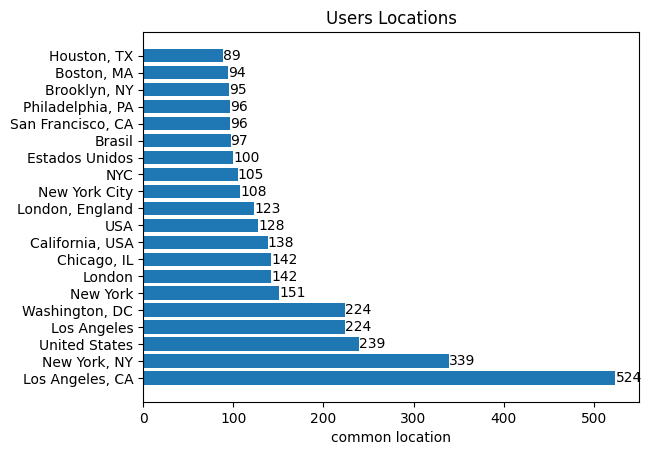

In [17]:
# Filtering out Nans and "unknown" values
location_feature = features[features.location != "unknown"].location.dropna()
c = Counter(location_feature)
common_locations = c.most_common(20)
common_locations_names = [x[0] for x in common_locations]
locations_instances = [x[1] for x in common_locations]

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(common_locations_names, locations_instances, align='center',color='green')
bars = ax.barh(common_locations_names, locations_instances)
ax.bar_label(bars)
ax.set_xlabel('common location')
ax.set_title('Users Locations')
plt.show()

We can see that:
- There are 5 different accurances of New York City in the 20 most popular locations.
- Although USA "contains" New York City, San Fransico, Los Angeles - there's also a separate category for generic USA

In [18]:
# The keys will be the aggragated location names and the values will be strings that if contained 
# in the original location name we'll map this location to the matching key
locations_mapper = {
    "New York": ["New York", "new york", "NY"],
    "Washington": ["Washington", "washington", "DC"],
    "London": ["London"],
    "San Francisco": ["San Francisco", "san francisco"],
    "Los Angeles": ["Los Angeles", "LA"],
    "United States of America": ["United States", "united states", "America", "america", "USA"],
    "Texas": ["TX", "Texas", "texas"],
    "California": ["California", "CA", "california"],
    "Chicago": ["Chicago", "chicago"],
    "India": ["India", "india"],
    "Estado Unidos": ["estado unidos", "Estado Unidos"],
}

def get_location_name(orig_location_name: str) -> str:
    for final_name, sub_names_options in locations_mapper.items():
        for location_sub_str in sub_names_options:
            if location_sub_str in orig_location_name:
                return final_name
    return orig_location_name

new_location_feature = location_feature.map(get_location_name)
new_location_feature.unique().size

10055

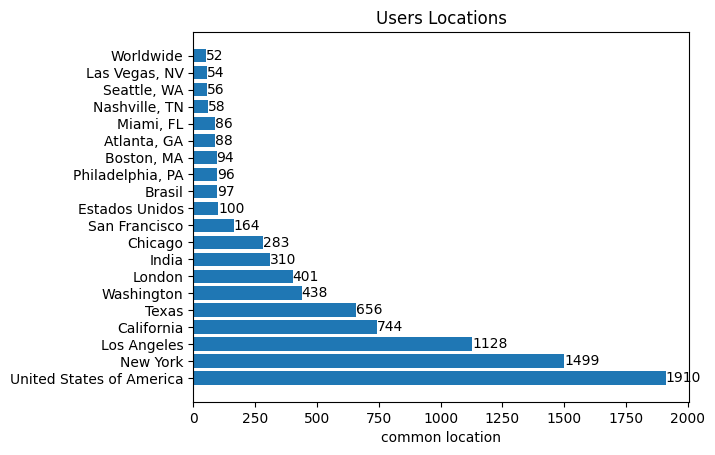

In [19]:
c = Counter(new_location_feature)
common_locations = c.most_common(20)
common_locations_names = [x[0] for x in common_locations]
locations_instances = [x[1] for x in common_locations]

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(common_locations_names, locations_instances, align='center',color='green')
bars = ax.barh(common_locations_names, locations_instances)
ax.bar_label(bars)
ax.set_xlabel('common location')
ax.set_title('Users Locations')
plt.show()

### world map from a top 50 country in the database

In [20]:
locations_mapper = {
    "United Kingdom": ["London", "UK"],
    "United States of America": ["Seattle, WA", "Nashville, TN", "Atlanta, GA", "Florida", "Boston, MA","Philadelphia, PA","Miami, FL", "New York","United States of America", "Los Angeles", "California", "Texas", "Washington", "Chicago","San Francisco"],
    "India": ["India", "Mumbai"],
    "Brazil": ["Brasil", "São Paulo","Brazil","Rio de Janeiro"],
    "Italy": ["Italy"],
    "Indonesia": ["Indonesia"],
    "Argentina": ["Argentina", "Buenos Aires, Argentina"],
    "Australia": ["Australia"],
    "Mexico": ["México", "Mexico"],
    "France": ["Paris"],
    "Canada": ["Canada", "Toronto, Ontario", "Toronto"],
    "Venezuela": ["Venezuela"],
    "Philippines": ["Philippines"],
    "Spain": ["Madrid"],
    "Turkey": ["İstanbul, Türkiye", "İstanbul"],
    "Italy": ["Italia"],
    "China": ["China"] 
}

def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

location_narrow = new_location_feature.map(get_location_name)

c = Counter(location_narrow)
common_locations = c.most_common(50)
common_locations_names = [x[0] for x in common_locations]
locations_instances = [x[1] for x in common_locations]
d = {'location': common_locations_names, 'instances': locations_instances}
location_dataframe = pd.DataFrame(data=d)

new_location = []
for row in common_locations_names:
     new_location.append(get_continent(row))
        
location_dataframe['codes'] = new_location
location_dataframe['Country'] = [x for (x,y) in new_location]
location_dataframe['Continent'] = [y for (x,y) in new_location]
location_dataframe = location_dataframe[location_dataframe['Country'] != 'Unknown']

In [21]:
#function to get longitude and latitude data from country name

geolocator = Nominatim(user_agent="twitter_bot_map")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    
countries = list(location_dataframe['Country'])
countries_coordinates = [geolocate(c) for c in countries]
location_dataframe['Geolocate'] = countries_coordinates
location_dataframe['Latitude'] = [x for (x,y) in countries_coordinates]
location_dataframe['Longitude'] = [y for (x,y) in countries_coordinates]

In [22]:
# Create a world map to show distributions of users 

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map) #for each coordinate, create circlemarker of user percent
for i in range(len(location_dataframe)):
        lat = location_dataframe.iloc[i]['Latitude']
        long = location_dataframe.iloc[i]['Longitude']
        radius=4
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(location_dataframe.iloc[i]['Country'],
                                   location_dataframe.iloc[i]['instances']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)#show the map
world_map

Although it looks much better, it's not scalabe and also not relaiable as we understand that users fill this with whatever they wish. So we decided to ignore this feature for now.

Let's go back to the `lang` feature, that looked more reliable than the location, as it seems to follow a common template of language shorts, so probably it's been filled by Twitter and not by the users themselves:

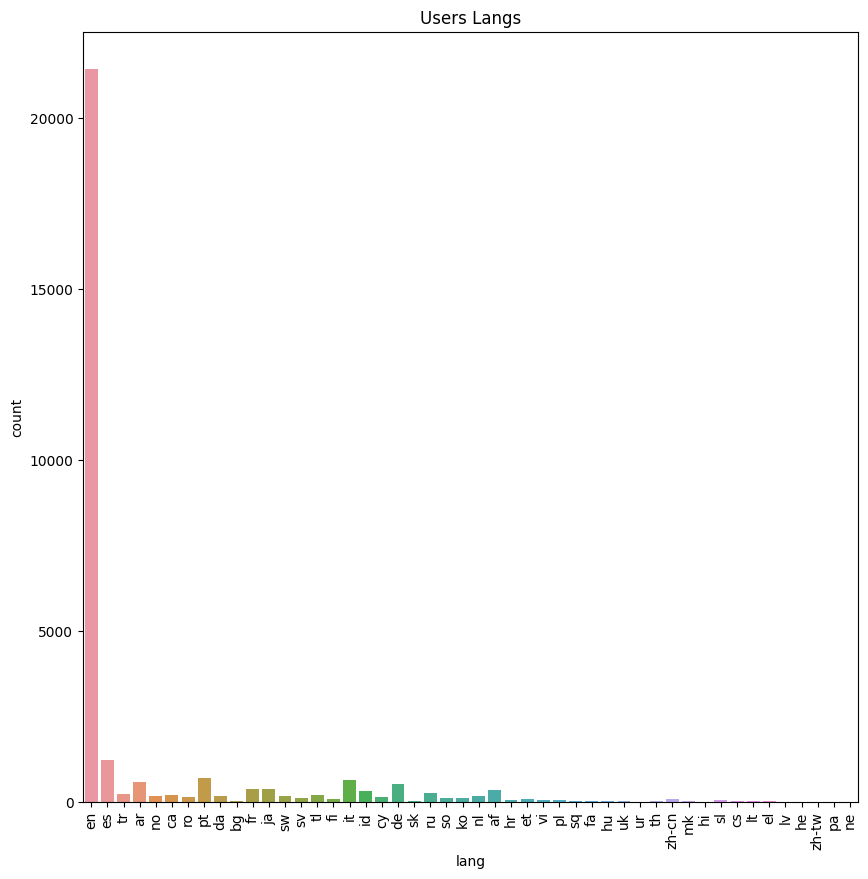

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=features, x='lang', ax=ax)
plt.xticks(rotation=90)
ax.set_title('Users Langs')
plt.show()

`en` is definitely the most popular language by far, but the drastic differences between the counts of `en` and all other languages makes it very difficult to understand what the other languages’ counts are, on the same axes with `en`. So we’ll use log_scale in order to see all the counts in aunite scale:

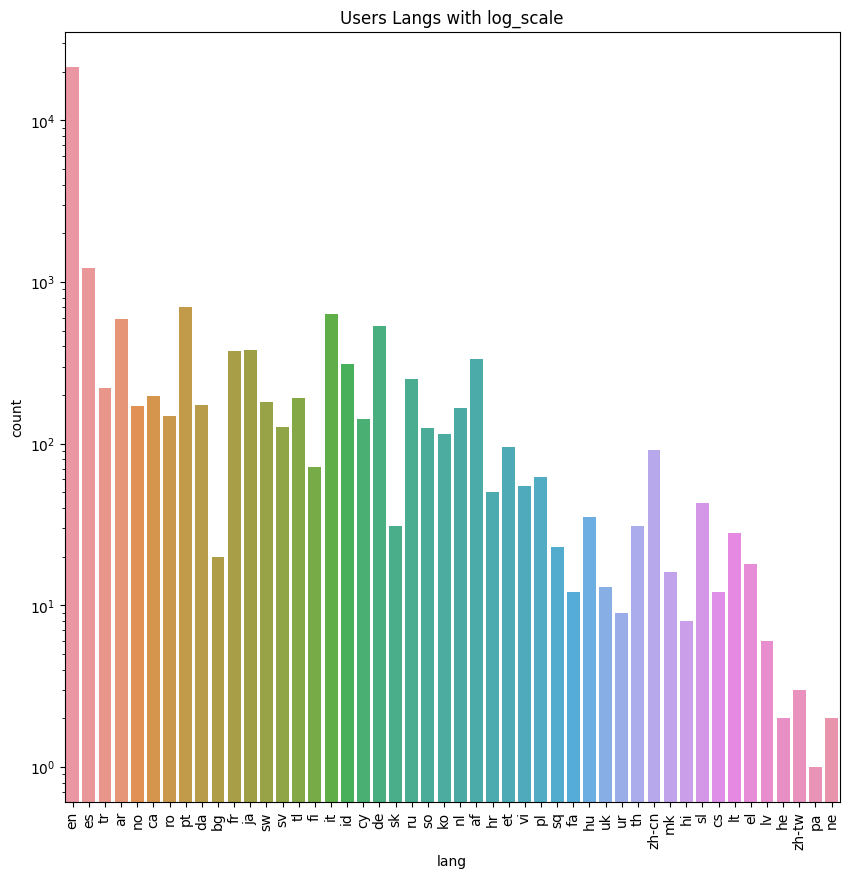

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=features, x='lang', ax=ax)
plt.xticks(rotation=90)
ax.set_title('Users Langs with log_scale')
plt.yscale('log')
plt.show()

And if we'll examine the distribution of bots and humans above this feature, again using log_scale in order to see `en` and other languages in the same scale:

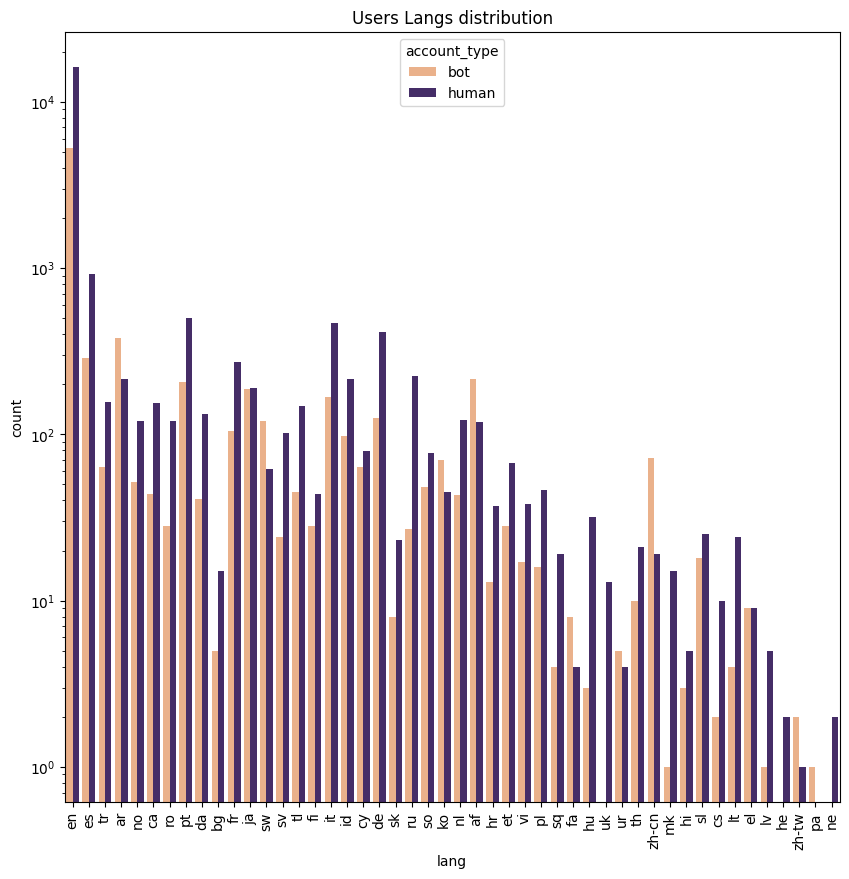

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=users_df, x='lang', hue='account_type', ax=ax, 
              palette={'human': '#432371','bot': '#FAAE7B'})
plt.xticks(rotation=90)
plt.yscale('log')
ax.set_title('Users Langs distribution')
plt.show()

From the above countplots we can learn that although `lang` is not a definite cutting feature, there are some languages that are anomalies and in case a user’s lang is one of these anomalies it might increase the chances that it’s actually a bot. The reason for that is that most of the languages have more humans than bots, but there are few languages that either have more bots than humans in it or either don’t have a very notable difference in the counts of the different account types like: `ar`, `ja`, `af` .

Despite that, we decided to convert the language feature into categorial one, so that it will be numeric and we'll be able to include it in numeric calculations

In [25]:
features['lang'] = features['lang'].astype('category').cat.codes
numeric_features_names.append('lang')

### Numeric Features Analysis

#### Analyzing number of tweets per day for bots

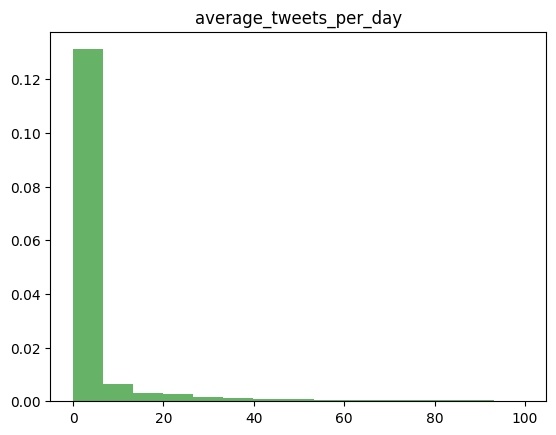

C:\Dev_projects\TwitterBotsProject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


DescribeResult(nobs=12265, minmax=(0.0, 99.771), mean=4.308753444761516, variance=135.96494935848148, skewness=4.501501606908133, kurtosis=22.86506138856862)

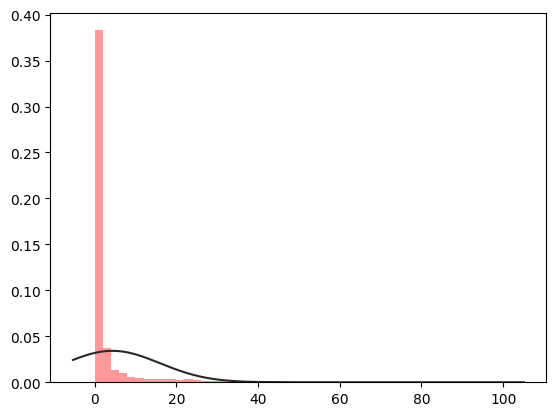

In [26]:
bots_indexes = classes=='bot'
bots_with_less_than_100_tweets = features[bots_indexes].where(features['average_tweets_per_day'] < 100)
bots_with_less_than_100_tweets = bots_with_less_than_100_tweets['average_tweets_per_day'].dropna()
x = np.array(bots_with_less_than_100_tweets)
plt.hist(x, bins=15, density=True, alpha=0.6, color='g')
plt.title('average_tweets_per_day')
plt.show()
sns.distplot(x, fit=stats.norm, kde=False, color='r')
stats.describe(x)

In [27]:
bots_with_more_than_100_tweets = features[bots_indexes].where(features['average_tweets_per_day'] > 100)
bots_with_more_than_100_tweets = bots_with_more_than_100_tweets['average_tweets_per_day'].dropna()
stats.describe(bots_with_more_than_100_tweets)

DescribeResult(nobs=160, minmax=(100.31, 1269.055), mean=232.88893124999998, variance=46389.0488519009, skewness=2.9274666984009134, kurtosis=8.677844275614312)

we learn from it that most of the bots tweets less then 100 time for day and there is bots that tweets spam more then 100 tweets per day.

Conclusion -> we need to identify different bots(spam, good bots, bad bots..)
Maybe we can do this by identifying certain hashtags or words from the tweets.

### Distribution of Human VS Bots above numeric features

Now let's take a look on the numeric features distribution above the classification to bot / human with a `violinplot`.

As mentioned above, in order to show all the numeric features on one unite axes, we have to normalize the features' values as each of them has a different range of values. We did that by subtracting from each value its column mean value and then dividing it by the column’s standard deviation. This normalization method is known as `Normalization by Standart Deviation` or `Z-scored`

There were also many columns with very few values in the edges of the column values range. These cause very long tails in the violinplot view, so in order to see the major area where the data is concentrated, we also had to cut the plot and set a lower limit to the Y axis.

In [28]:
numeric_features = features[numeric_features_names]

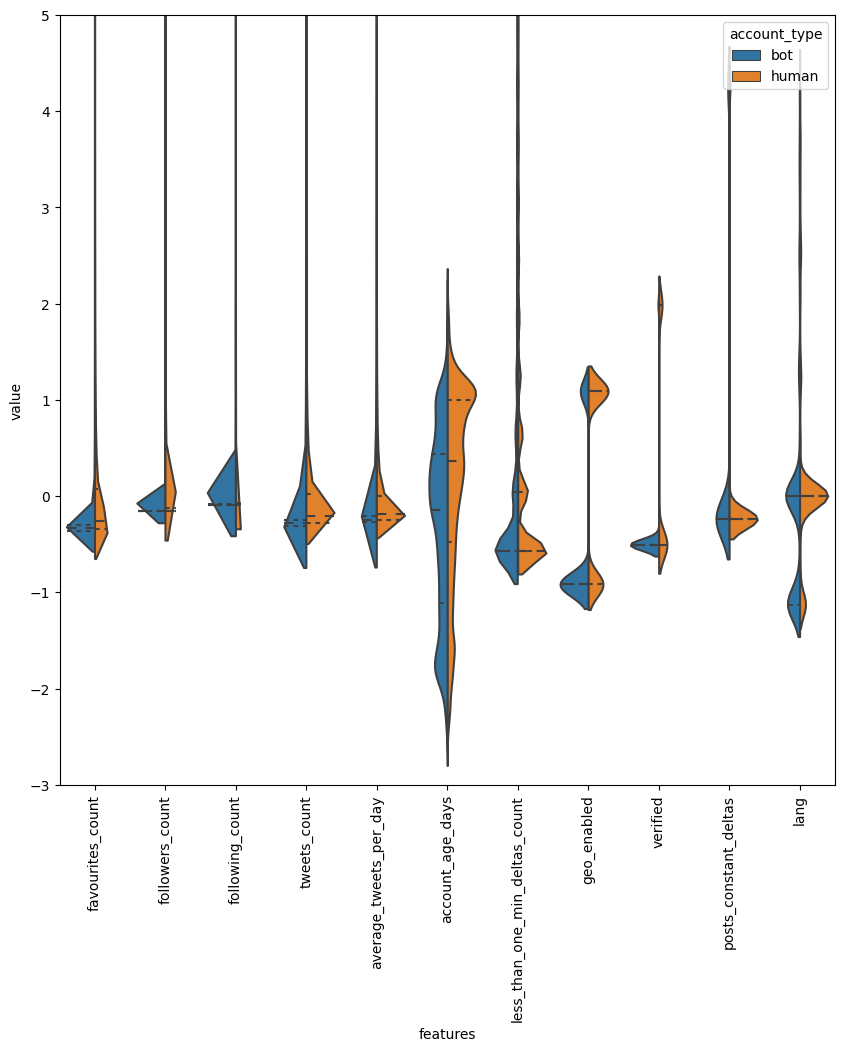

In [29]:
numeric_normalized_features = ((numeric_features - numeric_features.mean()) / numeric_features.std())
data = pd.concat([classes, numeric_normalized_features], axis=1)
data = pd.melt(data, id_vars="account_type",
                     var_name="features",
                     value_name='value')

plt.figure(figsize=(10,10))
ax = sns.violinplot(x="features", y="value", hue="account_type", data=data, split=True, inner="quart")
ax.set(ylim=(-3, 5))
plt.xticks(rotation=90);

We can see that according to these distributions there's no very clear separator feature, but there are some features with areas that imply they will probably contribute at least something to our features-based classification. 

For example, we can see that most of the bots have lower (probably a value of False=0) geo_enabled values, compared to humans in this feature that mostly concentrated in the upper area of the Y-axis.

### Correlations

In [ ]:
data = pd.concat([classes, numeric_normalized_features], axis=1)
sns.pairplot(data, hue='account_type', size=2.5);

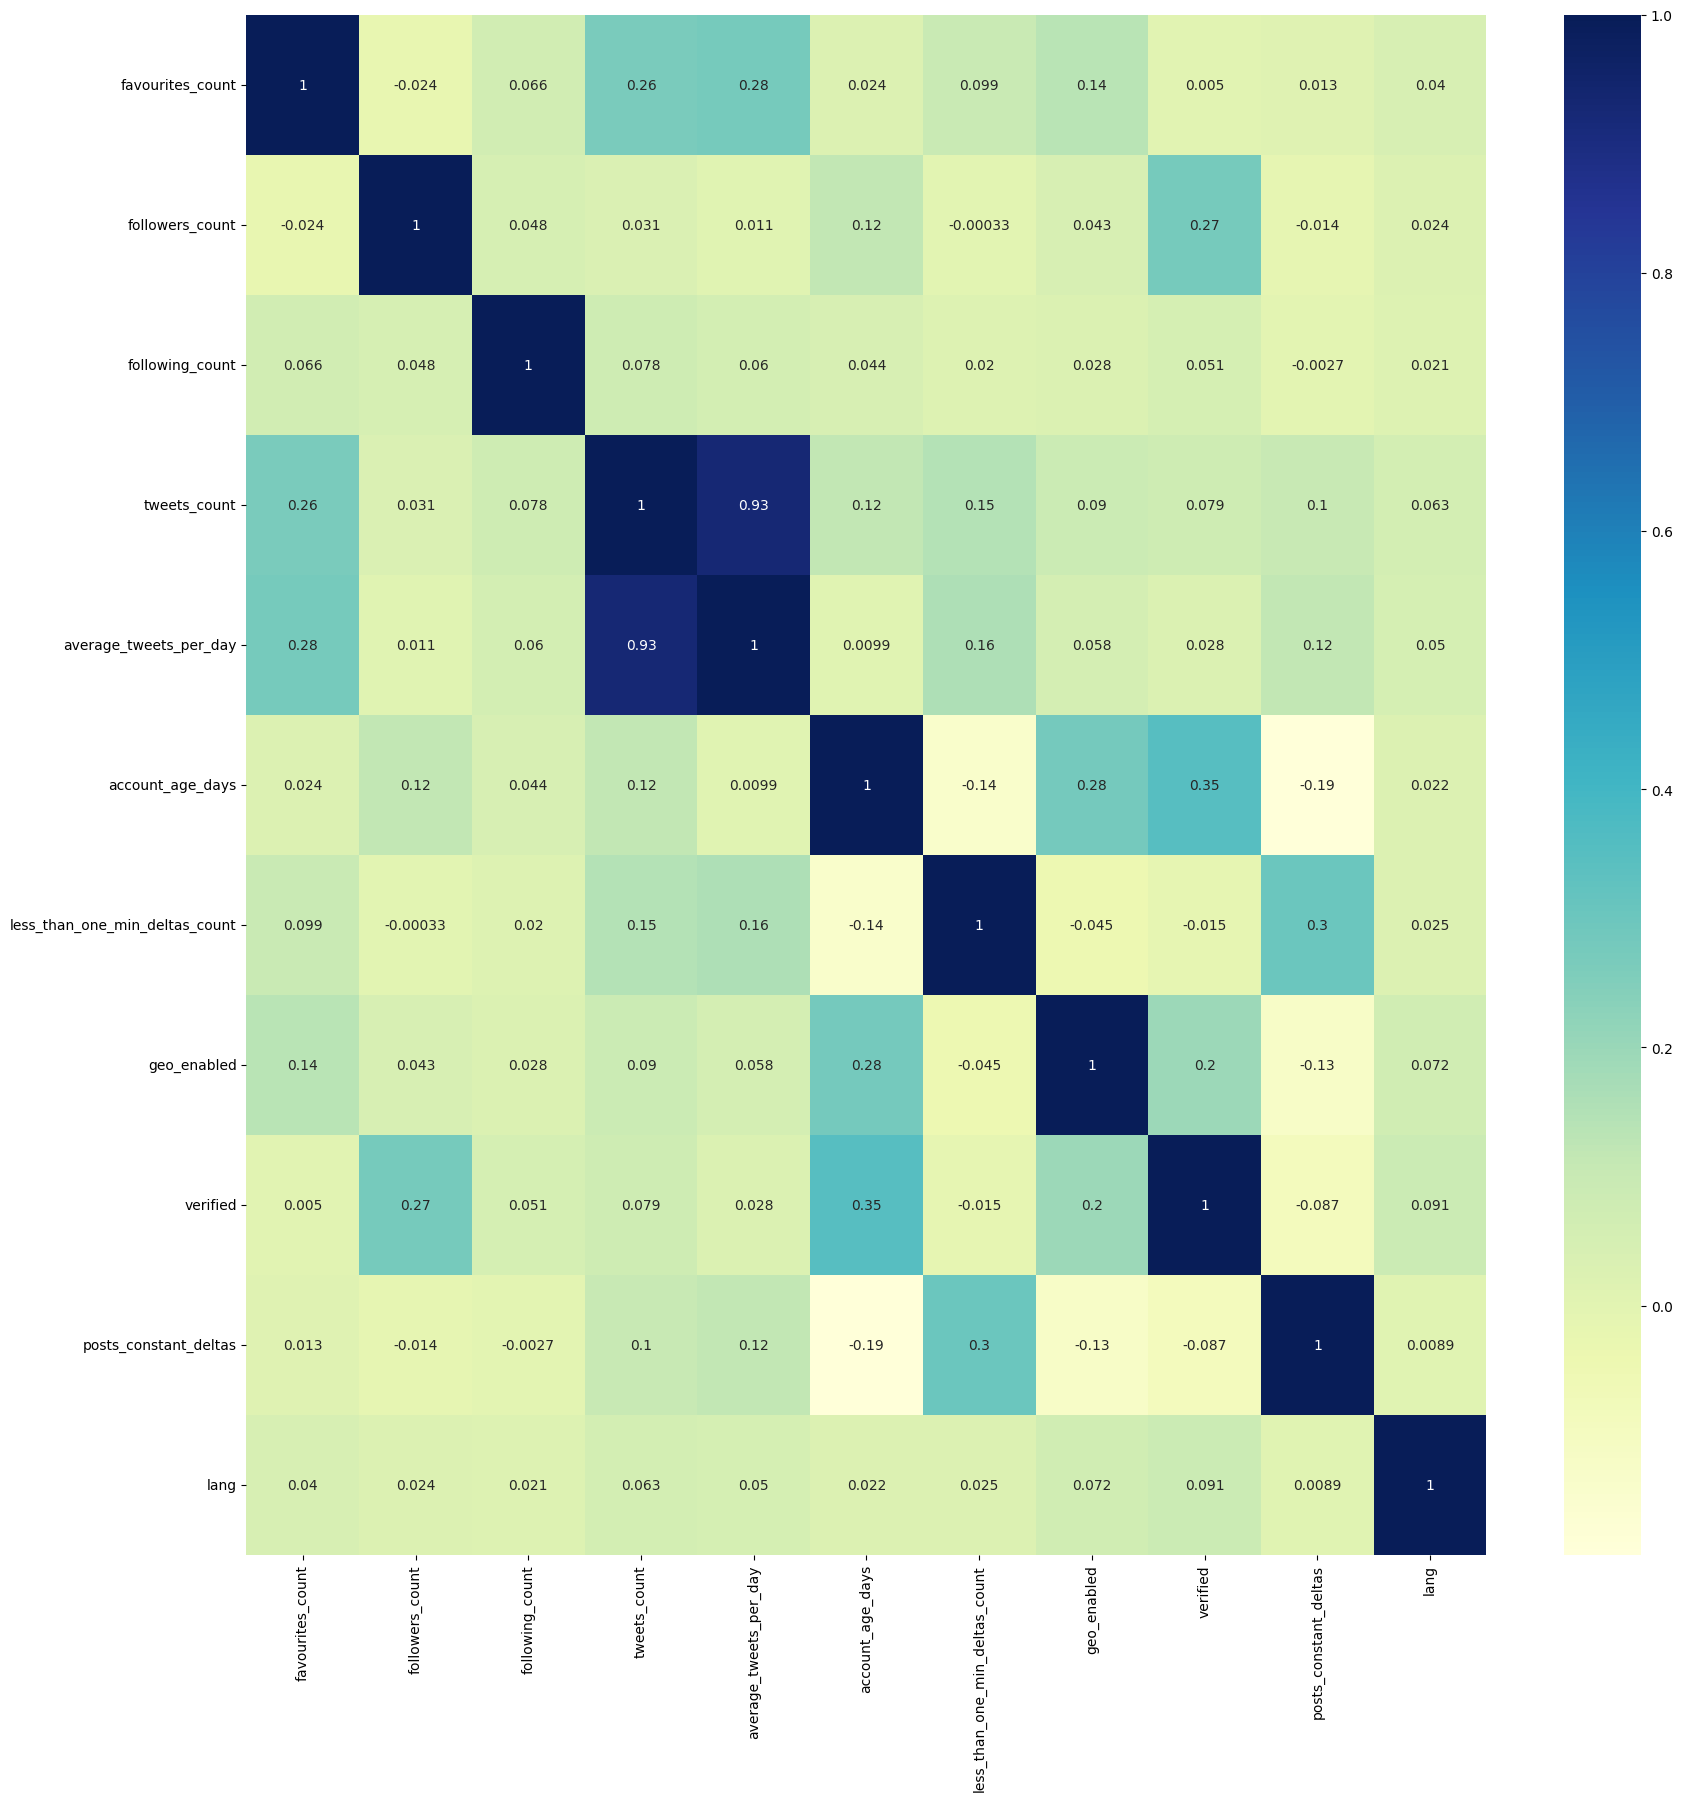

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric_normalized_features.corr(), cmap="YlGnBu", annot=True);

In this heatmap we can see that there's a pretty high correlation between the `average_tweets_per_day` and `tweets_count` features, which really makes sense. Also, if we'll go back to the multiple feature violinplot we'll find that these features' plots are very similar and that their shapes are almost the same - this could already imply on their strong correlation.

# EDA - tweets from TwitterAPI

## HashTag Analysis

At this section we will use the data that we scraped from TwitterAPI - we took the twitter user id from kaggle and find what is intereste us.

we will use 'from wordcloud import WordCloud' to show hashTags of the tweetes.
For each user we have 'source' of tweet, we'll remove Twitter for iPhone,Twitter for Android and Twitter Web App.

In [37]:
user_tweets_path = r"twitter_human_bots_dataset/tweets140522.csv"
user_tweet_data = pd.read_csv(user_tweets_path)

In [32]:
user_tweet_data_no_iphone = user_tweet_data.loc[user_tweet_data["source"] != "Twitter for iPhone"]
user_tweet_data_no_android = user_tweet_data_no_iphone.loc[user_tweet_data_no_iphone["source"] != "Twitter for Android"]
user_tweet_data_no_web = user_tweet_data_no_android.loc[user_tweet_data_no_android["source"] != "Twitter Web App"]
hashtags = user_tweet_data_no_web['hashtags']
hashtags_list = []
regex = re.compile('[^a-zA-Z]')
for h in hashtags:
    if isinstance(h,str):
        h = regex.sub('', h)
        if len(h)!=0:
            hashtags_list.append(h)

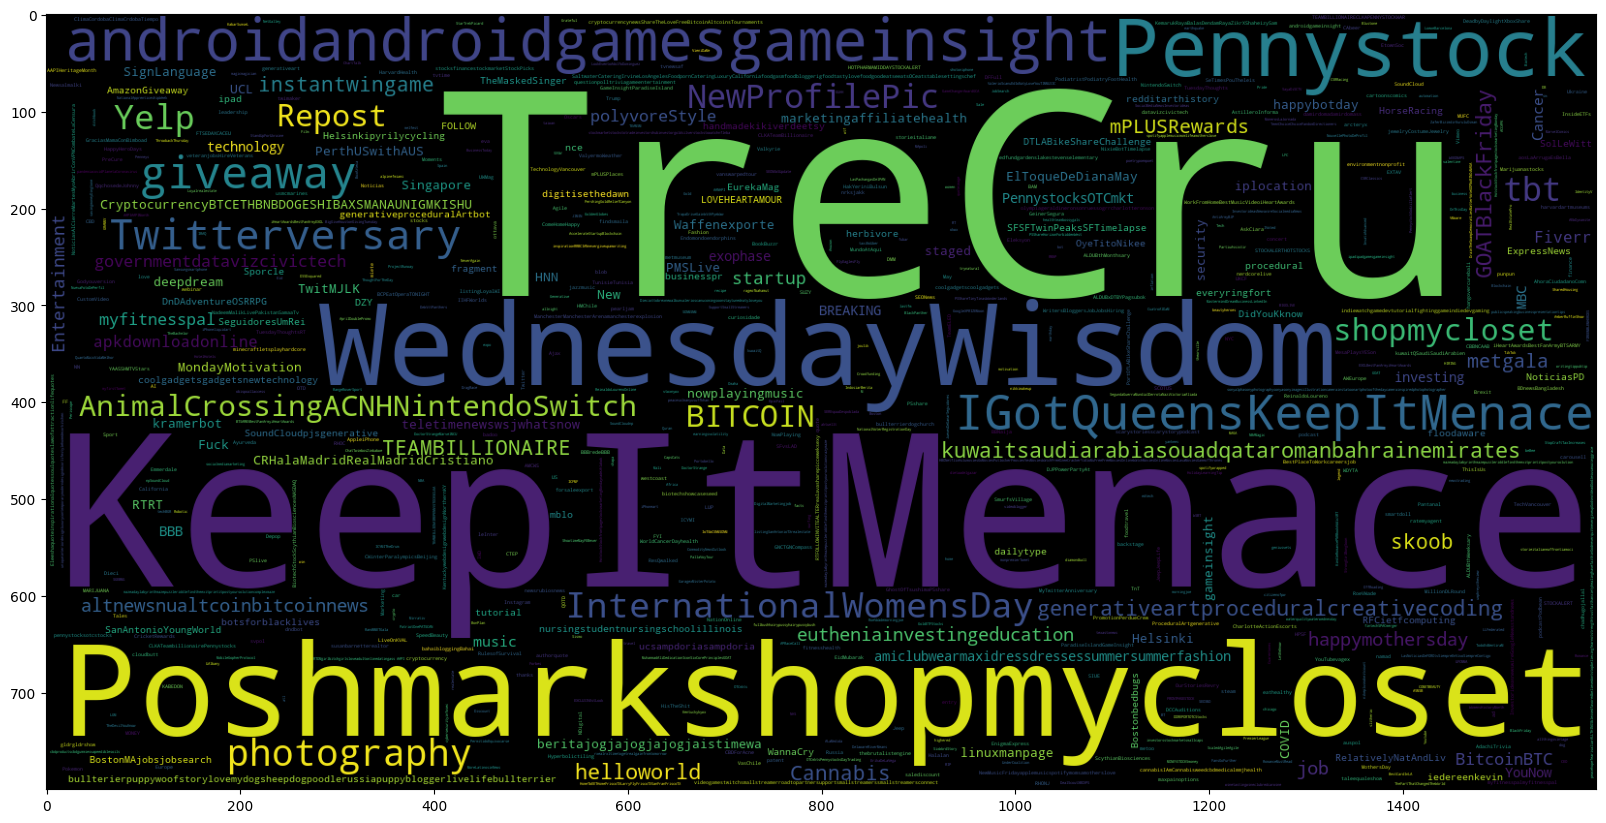

In [33]:
# Create and generate a word cloud image:
plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(' '.join(hashtags_list))
# Display the generated image:
plt.imshow(wordcloud)

# Follower and Following Analysis

## Reputation Analysis

In the academic article `TwiBot-20`, they created a new calculated feature which they presented as an `Account Reputation`. They explored the difference between the reputation score of bot and genuine users in TwiBot-20 and found that reputation is a coefficient that measures a user’s follower count and friend count. They observed that, human users are more likely to follow "famous" or "reputable" users. A celebrity usually has many followers and few friends, and his reputation is close to 1. In contrast, for a bot with few followers and many friends, its reputation is close
to 0.

We took their formula and calculated this new reputation feature:

In [39]:
# Monitin calcultaions of users to find bot based on the Twi-bot20 research

reputation_set = pd.concat([features[['followers_count', 'following_count']], account_ids], axis=1)
# Monitin calculation Formula
reputation_value = reputation_set.T.loc['followers_count'] / \
                    (reputation_set.T.loc['following_count'] + reputation_set.T.loc['followers_count'])
reputation_set.insert(3, "reputation", reputation_value, True)
reputation_set

followers_count  following_count          id  reputation
0                  102              168    53779179    0.377778
1                   60              128   105916557    0.319149
2                  599              449   509788597    0.571565
3                  116              334    70601327    0.257778
4                74448               18   108999927    0.999758
...                ...              ...         ...         ...
37433           257294              196   223764929    0.999239
37434            74666               95   222789645    0.998729
37435           255941              236    80438218    0.999079
37436          2678042               51  1296642259    0.999981
37437           471451            15967   236242525    0.967242

[37438 rows x 4 columns]

Before continuing analyzing this new parameter, we want to add it to our numeric features for further classification flows and learning...

In [40]:
numeric_features.insert(11, "reputation", reputation_value, True)
users_df.insert(24, "reputation", reputation_value, True)
numeric_features_names.append("reputation")
numeric_features

favourites_count  followers_count  following_count  tweets_count  \
0                  5007              102              168          3974   
1                  1038               60              128           259   
2                  2257              599              449         13627   
3                  6407              116              334          4432   
4                 20866            74448               18         15870   
...                 ...              ...              ...           ...   
37433             59660           257294              196         58680   
37434                 0            74666               95         41240   
37435                28           255941              236          6692   
37436               621          2678042               51          2042   
37437              4526           471451            15967         11597   

       average_tweets_per_day  account_age_days  \
0                       0.978              4063   
1                       0.067              3866   
2                       4.406              3093   
3                       1.107              4005   
4                       4.116              3856   
...                       ...               ...   
37433                  16.562              3543   
37434                  11.633              3545   
37435                   1.686              3969   
37436                   0.755              2704   
37437                   3.305              3509   

       less_than_one_min_deltas_count  geo_enabled  verified  \
0                                 1.0            0         0   
1                                 1.0            0         0   
2                                 0.0            1         0   
3                                 0.0            1         0   
4                                 0.0            1         1   
...                               ...          ...       ...   
37433                             1.0            1         1   
37434                             0.0            0         1   
37435                             0.0            1         0   
37436                             0.0            0         1   
37437                             0.0            1         0   

       posts_constant_deltas  lang  reputation  
0                        0.0    -1    0.377778  
1                        0.0     9    0.319149  
2                        0.0    -1    0.571565  
3                        0.0    -1    0.257778  
4                        0.0    10    0.999758  
...                      ...   ...         ...  
37433                    0.0     9    0.999239  
37434                    0.0    38    0.998729  
37435                    0.0    10    0.999079  
37436                    0.0     9    0.999981  
37437                    0.0    31    0.967242  

[37438 rows x 12 columns]

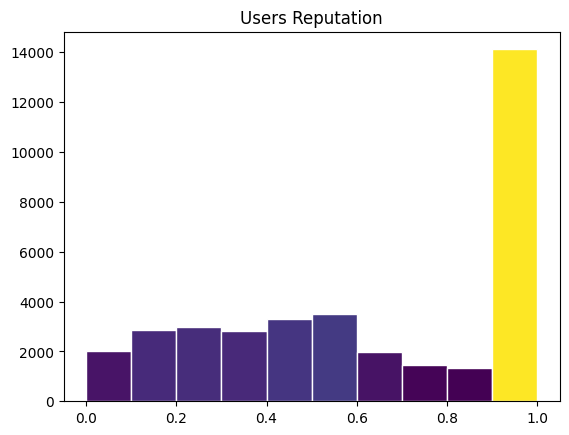

Length of each partition  [ 2018.  2857.  2986.  2831.  3308.  3496.  1983.  1467.  1346. 14112.]


In [41]:
# Sort users by reputation and drop NaNs
sorted_reputation_set = reputation_set.sort_values(by=['reputation'])
sorted_reputation_set.dropna(subset = ["reputation"], inplace=True)

n_bins = 10
reputation_values = list(sorted_reputation_set.get('reputation'))
plt.title('Users Reputation')
N, bins, patches = plt.hist(reputation_values, n_bins, edgecolor='white')
fracs = N / N.max()

# We need to normalize the data to the range of 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
plt.hist(reputation_values, bins=n_bins, density=True)
plt.show()
print("Length of each partition ", N)

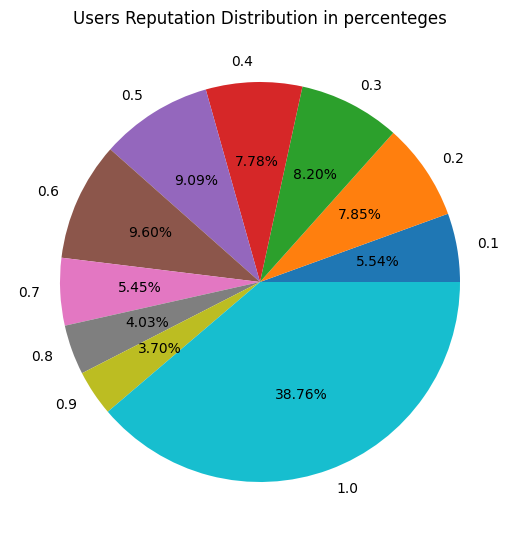

In [42]:
reputation_percents_dist = [i/sum(N)*100 for i in N]
mylabels = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
y = np.array(reputation_percents_dist)
ax.pie(y, labels = mylabels,autopct='%1.2f%%')
ax.set_title("Users Reputation Distribution in percenteges")
plt.show()

Relying on the academic article that provided this Formula we used for calculating the reputation feature, we can assume that most of the users in the slice of range 0-0.1 should be bots.

Let's check it by comparing this to the original data we have from Kaggle:

In [43]:
account_type_df = users_df.get(['account_type', 'id'])
id_reputation_df = reputation_set.get(['reputation', 'id'])
reputation_df = pd.merge(account_type_df, id_reputation_df, how='inner', on = 'id')

reputation_sorted_df = reputation_df.sort_values(by=['reputation'])
bots_repu_sorted_df = reputation_sorted_df.loc[reputation_sorted_df['account_type']=='bot']

bots_repu_sorted_df

account_type                  id  reputation
29716          bot           365476963         0.0
33660          bot  832724063445405696         0.0
16430          bot  784318418862284800         0.0
13798          bot  849647465989058564         0.0
14617          bot           862629757         0.0
...            ...                 ...         ...
37110          bot  877491177876054017         NaN
37116          bot  877405056966037504         NaN
37129          bot  877398270519070720         NaN
37177          bot  877405472747401217         NaN
37349          bot  878072807107600384         NaN

[12425 rows x 3 columns]

Bots with calculated reputation count:  12425
Percentage of bot by reputation: [11.527208894090112, 10.540834238903285, 9.186658864833236, 7.247345983448968, 7.121959374738777, 6.5368218674245595, 3.067792359775976, 2.273677171278108, 1.9727493103736522, 40.52495193513333]
length of each partition  [1379. 1261. 1099.  867.  852.  782.  367.  272.  236. 4848.]


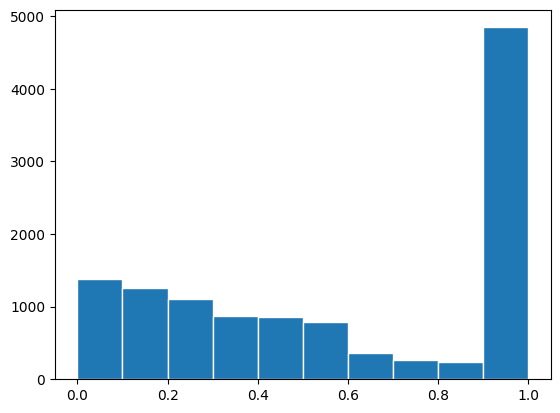

In [44]:
print(f"Bots with calculated reputation count: ", bots_repu_sorted_df.shape[0])
n_bins = 10
bot_reputation_values = bots_repu_sorted_df.get('reputation').tolist()
N1, bins1, patches1 = plt.hist(bot_reputation_values, n_bins, edgecolor='white')

bots_reputation_percents_dist = [i/sum(N1)*100 for i in N1]

print("Percentage of bot by reputation:", bots_reputation_percents_dist)
print("length of each partition ", N1)

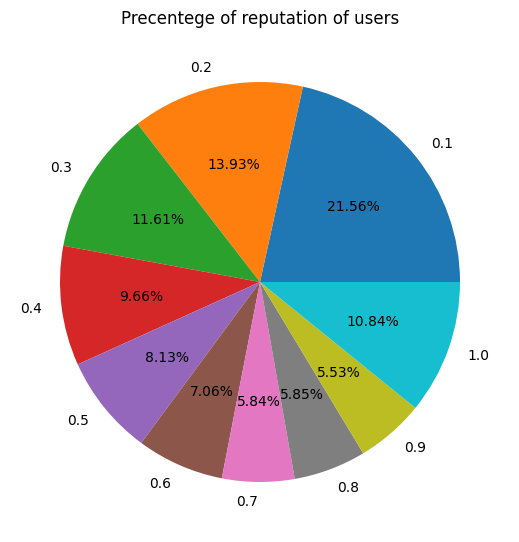

In [45]:
bot_prec_by_partition = []
for n1, n2 in zip(N1, N): # 
    bot_prec_by_partition.append(n1/n2)

percentage_lables = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]

fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_axes([0,0,1,1])
ax1.axis('equal')
y1 = np.array(bot_prec_by_partition)
ax1.pie(y1, labels = percentage_lables, autopct='%1.2f%%')
ax1.set_title("Precentege of reputation of users")
plt.show()

As we can see from this cake sliced visualization, which contains the reputation calculations distribution of only the bots from the dataset, we actually can see that the reputation of most of the bots is smaller than 0.5, as expected- Awesome! So the formula is potentially a good criteria. 

We can also notice that the slices of labels 0.5-0.9 are relatively thin, but something not so good is going on in the slice of 1.0 - which should contain only humans according to the article and its Formula.

We assume that there're probably some very good-faked bots in our dataset, that made a good work and created a reliable ratio between the counts of their followers and following users.

## Users IDs networks by followers and following

When enriching the dataset from Kaggle using Twitter API, we also requested the [Follows endpoint](https://developer.twitter.com/en/docs/twitter-api/users/follows/api-reference/get-users-id-followers) and created another enriched dataset of followers (instead of having only the followers count, we also requested for some users' followers basic information). 

So now we came to the point where this enriched dataset becomes relevant- We took the csv we created and we started building networks representing our actual bots-humans users network, where the meaning of connections is actually following users. 

As a first step we'll analyze this dataset and clean it in order to be able to represent it as a graph.

In [46]:
followers_csv_file_path = r"twitter_human_bots_dataset/followers040522.csv"
enriched_followers_df = pd.read_csv(followers_csv_file_path, encoding='latin-1')

# data overview
print(f"Rows Count: {enriched_followers_df.shape[0]}")
print(f"Features Count: {enriched_followers_df.shape[1]}")

#create edges list from users following list
followers_df = enriched_followers_df.get(['followed_id','follower_id'])
followers_df = followers_df[followers_df.followed_id != " "].dropna()
followers_df = followers_df[followers_df.follower_id != " "].dropna()
followers_df.to_csv(r'twitter_human_bots_dataset/edge_list.txt', header=None, index=None, sep=' ', mode='a')

# The first data from the Twitter API
followers_df

Rows Count: 44558
Features Count: 12


followed_id   follower_id
0       53779179.0  7.820000e+17
1       53779179.0  1.390000e+18
2       53779179.0  1.470000e+18
3       53779179.0  1.480000e+18
4       53779179.0  1.032883e+08
...            ...           ...
44553   62204119.0  2.123391e+08
44554   62204119.0  1.851208e+08
44555   62204119.0  9.322179e+07
44556   62204119.0  1.541112e+07
44557   62204119.0  9.355046e+07

[44537 rows x 2 columns]

### Understanding the data

We wanted to merge the followers data with the users data from the original users dataset, in order to see the following/followers

In [47]:
followers_dict = defaultdict(set)
none_counter = 0

for index, row in followers_df.iterrows():
    try:
        if isinstance(row['followed_id'], float) and isinstance(row['follower_id'], float):
            user_id = int(float(row['followed_id']))
            following_id = int(float(row['follower_id']))
            followers_dict[user_id].add(following_id)
        else:
            none_counter += 1 # problem with data
    except Exception as e:
        print(index, e)
            
print("number of users we enriched with followers data from Twitter API: ", len(followers_dict))
print("number of missing users data: ", none_counter)

followers_counts_dict = {}
for key, values in followers_dict.items():
    followers_counts_dict[key]= len(values)

sorted_followers_count_dict = {}
sorted_users_by_followers_count = sorted(followers_counts_dict, key=followers_counts_dict.get, reverse=True)

print("The users sorted by the count of their following users: ", sorted_users_by_followers_count)

number of users we enriched with followers data from Twitter API:  84
number of missing users data:  0
The users sorted by the count of their following users:  [2227979517, 120538744, 410303609, 292920781, 206795782, 121389491, 194490327, 172028587, 16378198, 281473975, 2444454050, 319916258, 28471026, 16967612, 242916135, 62204119, 17685964, 27055023, 509788597, 31139434, 44051445, 155568211, 284265377, 262355899, 1449155815, 2806413827, 99847971, 108999927, 3930997512, 15998107, 488512845, 49031917, 169421357, 2557037323, 138600717, 3237927257, 997629601, 49717874, 66209470, 569581750, 1210485564, 105874636, 1063034450, 2952010610, 8161232, 709541000000000000, 496493810, 36149861, 70601327, 50885229, 955613694, 237947008, 892830000000000000, 1353020900, 53779179, 3262306109, 54135314, 178218286, 33289393, 3245648312, 105916557, 3327665070, 33416325, 2493362950, 2370489267, 392228721, 716613000000000000, 15380583, 963263894, 507975093, 2765054066, 2157748434, 537500546, 865213866, 334

In [48]:
followers_df

followed_id   follower_id
0       53779179.0  7.820000e+17
1       53779179.0  1.390000e+18
2       53779179.0  1.470000e+18
3       53779179.0  1.480000e+18
4       53779179.0  1.032883e+08
...            ...           ...
44553   62204119.0  2.123391e+08
44554   62204119.0  1.851208e+08
44555   62204119.0  9.322179e+07
44556   62204119.0  1.541112e+07
44557   62204119.0  9.355046e+07

[44537 rows x 2 columns]

In [49]:
# merge between reputation_sorted_df and followers_df to graph with labels
adapted_followers_df = followers_df.rename(columns={"followed_id": "id"})
adapted_followers_df['id'] = adapted_followers_df['id'].astype(np.int64)
adapted_followers_df['follower_id'] = adapted_followers_df['follower_id'].astype(np.int64)
followers_reputation_df = pd.merge(adapted_followers_df, reputation_sorted_df, on = "id" )

followers_repu_unique_id_df = followers_reputation_df.drop_duplicates(subset=['id'])
followers_repu_unique_id_df = followers_repu_unique_id_df.drop(columns="follower_id")

# creating 2 list for future classification on the graph
bot_nodes_list = list(followers_repu_unique_id_df.loc[followers_repu_unique_id_df['account_type']=='bot'].get('id'))
human_nodes_list = list(followers_repu_unique_id_df.loc[followers_repu_unique_id_df['account_type']=='human'].get('id'))

followers_repu_unique_id_df

id account_type  reputation
0        53779179          bot    0.377778
120     105916557        human    0.319149
177     509788597        human    0.571565
744      70601327        human    0.257778
859     108999927        human    0.999758
...           ...          ...         ...
42187   313116175          bot    1.000000
42191  3237927257          bot    0.788235
42586    50885229        human    0.663043
42715  3327665070        human    0.080092
42748    62204119        human    0.458492

[79 rows x 3 columns]

## Using networkX for Analyzing a bot

After we have merged the databases, we would like to try to analyze parameters for bot identification by networksX.
We have created a data structure that contains the nodes and links between them and in the initial stage we will try to understand what the information contains.

In [50]:
G = nx.from_pandas_edgelist(followers_reputation_df, source='id', target='follower_id')
print("Number of nodes: ", nx.number_of_nodes(G)) # size of nodes in graph
print("number of connected component: ", nx.number_connected_components(G))

Number of nodes:  21984
number of connected component:  8


This is a lot(!) of nodes, so we must reduce the size of this graph in order to:
1. Visualize this graph and actually be able to see something and understand it. 
2. Drawing a graph in this scale takes some time.

So firstly we decided to remove all nodes with a degree smaller than 2 (means that these nodes have less than 2 connected edges). In addition, we perform another nodes’ random reduction, so that in each execution we'll get a different graph.

### centrality
After the reduction steps, We took the biggest connected subgraph component and highlighted all its nodes by their <b>centrality</b>, which emphasizes how central/"main" they are in the graph, in terms of that we can find the shortest paths through them in the graph.

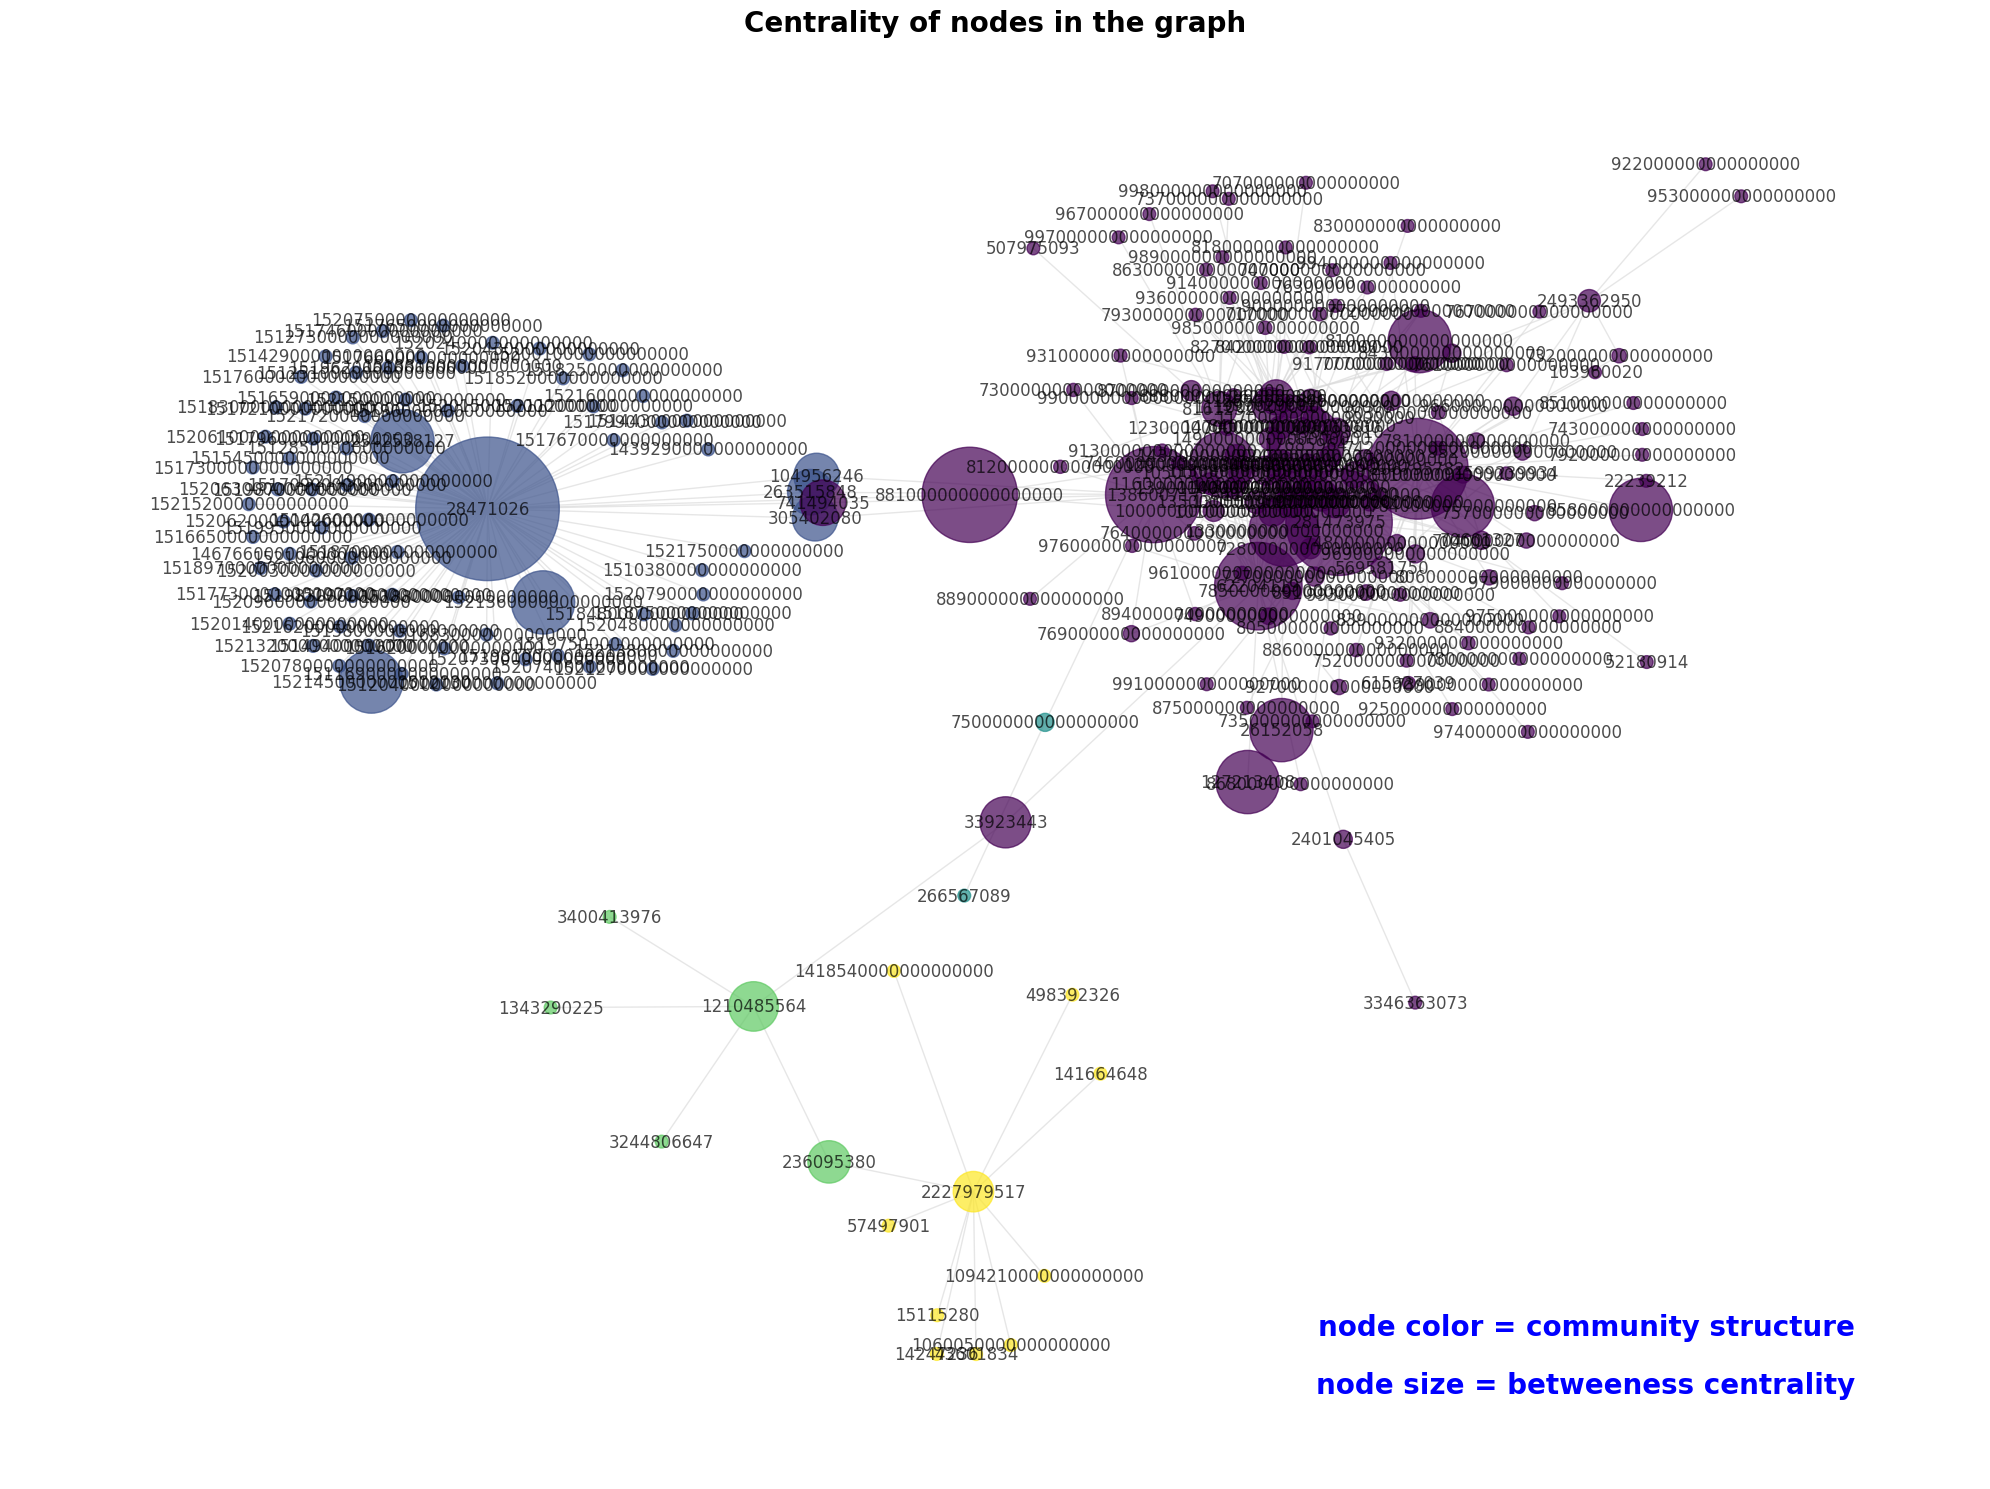

In [47]:
G1 = copy.deepcopy(G)
# remove low-degree nodes
low_degree_nodes = [n for n, d in G.degree() if d < 2]
G1.remove_nodes_from(low_degree_nodes)

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G1) / 1.5)
nodes_to_remove = sample(list(G1.nodes), num_to_remove)
G1.remove_nodes_from(nodes_to_remove)

# largest connected component
components = nx.connected_components(G1)
largest_component = max(components, key=len)
H = copy.deepcopy(G1.subgraph(largest_component))

# Compute the shortest-path betweenness centrality for nodes
centrality = nx.betweenness_centrality(H, k=10, endpoints=True) 
# Compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### Draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=True,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.7,
)
# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Centrality of nodes in the graph", font)
# Change font color for legend
font["color"] = "b"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In this graph, the large nodes represent the users that are more central to the network. We would like to undestand whether the more central nodes are bots and whether it can be characterized accordingly.

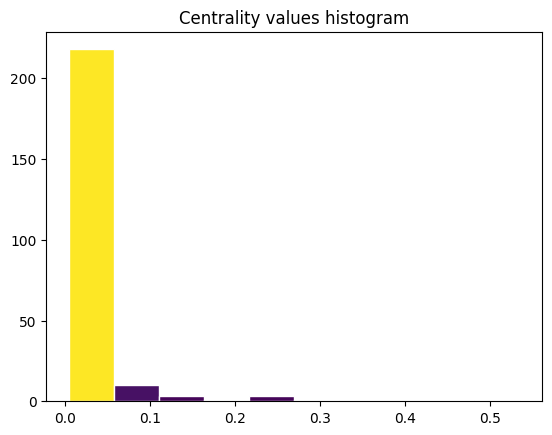

Length of each partition  [218.  10.   3.   1.   3.   1.   0.   0.   0.   1.]


In [48]:
# Histogram of the centrality in the graph
n_bins = 10
centrality_values = centrality.values()
plt.title('Centrality values histogram')
N, bins, patches = plt.hist(centrality_values, n_bins, edgecolor='white')
fracs = N / N.max()

# We need to normalize the data for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.show()
print("Length of each partition ", N)

We can see that there are very few "central" nodes, which means there's a very small amount of nodes that create centrality in the graph. Therefore, we can work with these centrality nodes only in a very few cases in order to actually find some real matches in the data.


## Dividing the  centrality graph to nodes by their account type

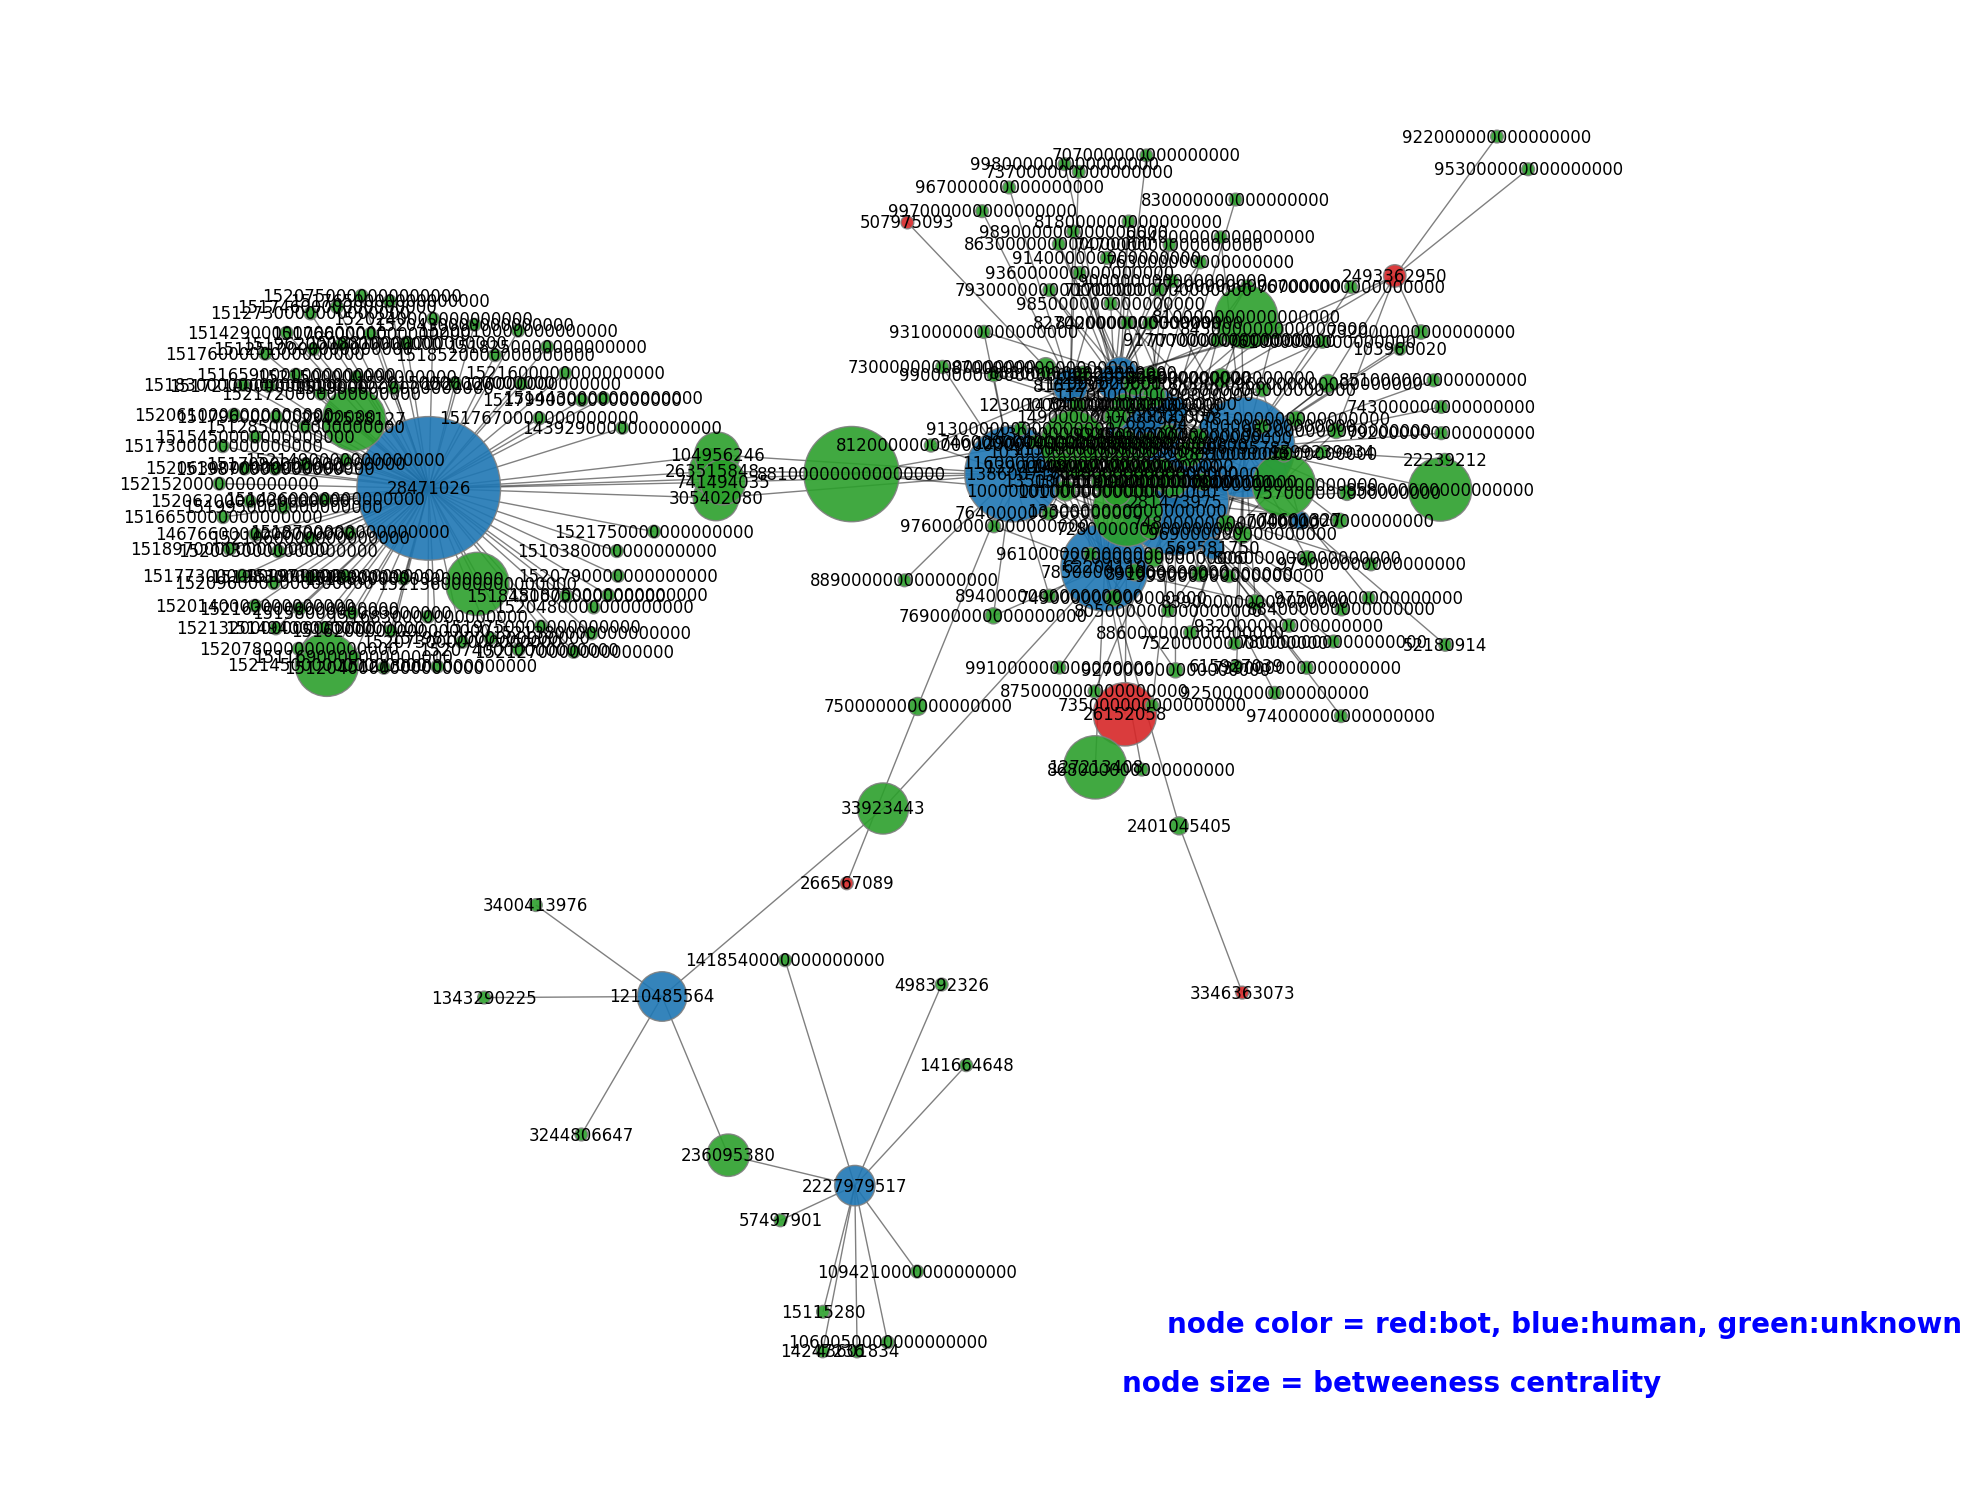

In [49]:
# prepare data for networkX
bot_nodes_sizes = []
bot_nodes_list = [b_no for b_no in bot_nodes_list if b_no in H.nodes]
centrality_bots_values = None
if len(bot_nodes_list) > 0:
    centrality_bots_values = [centrality[bot] for bot in bot_nodes_list]
    bot_nodes_sizes = [v * 20000 for v in centrality_bots_values]

human_nodes_sizes = []
human_nodes_list = [b_no for b_no in human_nodes_list if b_no in H.nodes]
if len(human_nodes_list) > 0:
    centrality_human_values = [centrality[human] for human in human_nodes_list]
    human_nodes_sizes = [v * 20000 for v in centrality_human_values]

# These nodes do not have the tagged account type as we got them from the follow Twitter API.
other_nodes_sizes = []
nodes_to_out = human_nodes_list + bot_nodes_list
other_nodes = [no for no in H.nodes if not no in nodes_to_out]
if len(other_nodes) > 0:
    centrality_other_valus = [centrality[other] for other in other_nodes]
    other_nodes_sizes = [v * 20000 for v in centrality_other_valus]
    
#start plot
fig, ax = plt.subplots(figsize=(20, 15))

nx.draw_networkx_labels(H, pos, font_size=12, font_family="sans-serif") # draw labels

#draw all nodes
options = {"edgecolors": "tab:gray", "alpha": 0.9}
nx.draw_networkx_nodes(H, pos=pos, nodelist=bot_nodes_list, node_color="tab:red",node_size=bot_nodes_sizes, **options)
nx.draw_networkx_nodes(H, pos=pos, nodelist=human_nodes_list, node_color="tab:blue",node_size=human_nodes_sizes, **options)
nx.draw_networkx_nodes(H, pos=pos, nodelist=other_nodes, node_color="tab:green",node_size=other_nodes_sizes, **options)

nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.5)

ax.text(
    0.90,
    0.10,
    "node color = red:bot, blue:human, green:unknown",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

And still the graph is pretty big, and that's why every time we randomly remove nodes from it we might get a totally different result here, so we attached a screenshot from one the runs we got here that also included bots in it:

<div>
<img src="img/bot_graph.jpeg" style="width: 950px; margin-top: 30px; margin-bottom: 30px;"/>
</div>

In [50]:
if centrality_bots_values:
    print(f"centrality_bots_values: {centrality_bots_values}")
else:
    print("There were no bots after the random selection of nodes")

centrality_bots_values: [0.00423728813559322, 0.01300182337986227, 0.00423728813559322, 0.1038135593220339, 0.00423728813559322]


Dividing the graph to nodes by their account type, shows us that <b>Bots are not necessarily central nodes in our graphs</b>, which brings us to the conclusion that it might not be a good enough parameter for identifying bots.

However, we did get a nice distinction and understanding for how the network of our users looks like and we still can continue to analyze these graphs with other parameters.

### Degree Analysis

This graph will helps us to visualize and understand how our users (both bots and humans) network looks - what is the structure, who are the central nodes, which edges and connections we have and so on...

In [52]:
list(G.degree())[:20] # we will notice we have a lot of 1 degree

[(53779179, 98),
 (782000000000000000, 11),
 (1390000000000000000, 32),
 (1470000000000000000, 29),
 (1480000000000000000, 33),
 (103288329, 1),
 (1440000000000000000, 35),
 (3402076510, 1),
 (1080000000000000000, 33),
 (1310000000000000000, 32),
 (1380000000000000000, 31),
 (746000000000000000, 12),
 (1350000000000000000, 34),
 (992000000000000000, 6),
 (1250000000000000000, 37),
 (1230000000000000000, 29),
 (532688190, 1),
 (1130000000000000000, 34),
 (1220000000000000000, 32),
 (820000000000000000, 13)]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Dev_projects\TwitterBotsProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\97254\AppData\Local\Temp\ipykernel_11268\2098103880.py", line 11, in <module>
    pos = nx.spring_layout(Gcc, seed=10396953)
  File "C:\Dev_projects\TwitterBotsProject\venv\lib\site-packages\networkx\utils\decorators.py", line 795, in func
    return argmap._lazy_compile(__wrapper)(*args, **kwargs)
  File "<class 'networkx.utils.decorators.argmap'> compilation 12", line 4, in argmap_spring_layout_9
    from pathlib import Path
  File "C:\Dev_projects\TwitterBotsProject\venv\lib\site-packages\networkx\drawing\layout.py", line 482, in spring_layout
    A, k, pos_arr, fixed, iterations, threshold, dim, seed
  File "C:\Dev_projects\TwitterBotsProject\venv\lib\site-packages\networkx\utils\decorators.py", line 795, in func
    return argmap._lazy_compile(__wrapper)(

TypeError: object of type 'NoneType' has no len()

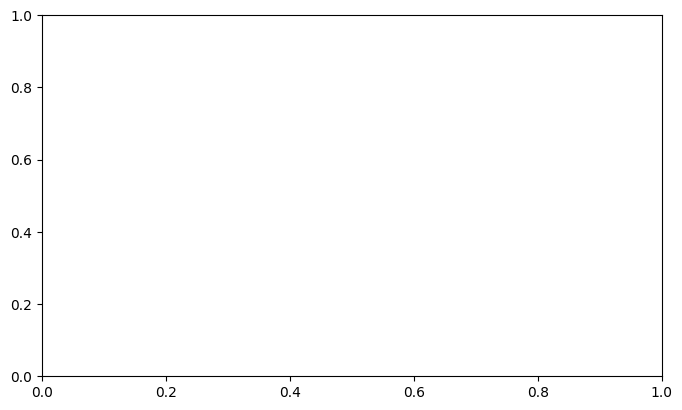

In [53]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure(figsize=(8, 8))

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = copy.deepcopy(G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]))
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Degree of graph G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

It can be seen that there are quite a few nodes that look like mushrooms, meaning they are nodes with grade 1 meaning they have no great significance to the graph.

We would like to find the nodes with the <b>highest ranks</b> in order to try to characterize bots with the help of this feature.
We will try also to identify in addition <b>bridges</b> that represent to us a very strong connectivity in the graph.

In [54]:
print(f"Does the graph has bridges: {nx.has_bridges(G)}")
bridges = list(nx.bridges(G))
bridges_keys = [k for k, v in bridges]

# Find common bridges in set
c = Counter(bridges_keys)
print(f"5 Most common bridges: {c.most_common(5)}")

Does the graph has bridges: True
5 Most common bridges: [(410303609, 994), (120538744, 981), (2227979517, 966), (292920781, 936), (206795782, 827)]


So if we remove some of these bridges, we create more components as these bridges deletion causes separation between main components. For example:

In [55]:
print(f"Number of connected components in the original graph: {nx.number_connected_components(G)}")
G2 = copy.deepcopy(G)
G2.remove_nodes_from(list(c)[:5])
print(f"Number of connected components in the graph after removing 5 bridges: {nx.number_connected_components(G2)}")

Number of connected components in the original graph: 8
Number of connected components in the graph after removing 5 bridges: 724


let's check if the nodes with the most ranks can be bot ?

In [58]:
most_rank_users_list = []
most_rank_users = [user_id for (user_id, rank) in c.most_common(5)]
for i in range(len(followers_repu_unique_id_df)):
    id_user = followers_repu_unique_id_df.iloc[i]['id']
    if id_user in most_rank_users:
        account_type = followers_repu_unique_id_df.iloc[i]['account_type']
        most_rank_users_list.append([id_user,account_type])
most_rank_users_list

[[206795782, 'human'],
 [2227979517, 'human'],
 [292920781, 'human'],
 [120538744, 'human'],
 [410303609, 'human']]

That is, at least in this graph the nodes with the highest ranks are real people according to the initial classification and therefore we will also skip combining this feature in our parameters.

## Community Detection for bot

We will now try to identify bots by communities in the graph, or whether such a common parameter can be found at all.
Let's try to understand if the bots are connected to each other:

In [55]:
bots_followers_reputation_df = followers_reputation_df.loc[followers_reputation_df['account_type']=='bot']
labels = list(bots_followers_reputation_df)
G_only_bots = nx.from_pandas_edgelist(bots_followers_reputation_df, source='id', target='follower_id')
print("Number of nodes: ", nx.number_of_nodes(G_only_bots)) # size of nodes in graph
print("number_connected_component: ", nx.number_connected_components(G_only_bots))

G_only_bots_without_low_degree = copy.deepcopy(G_only_bots)
low_degree_bots_only = [n for n, d in G_only_bots.degree() if d < 5]
G_only_bots_without_low_degree.remove_nodes_from(low_degree_bots_only)

Number of nodes:  2933
number_connected_component:  6


We have identified 6 binding components, we will try to analyze them to understand if relevant information can be extracted from them.
We will try to do this first with "Cliques"

## Finding Cliques

A clique is a subset of nodes in the graph such that every two distinct nodes in the clique are adjacent (connected).

Max clique number:  2


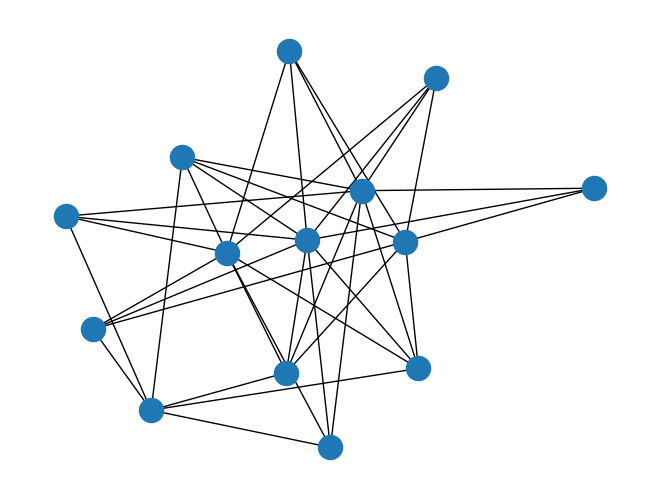

In [56]:
print("Max clique number: ",nx.graph_clique_number(G_only_bots_without_low_degree))
cliques = nx.find_cliques(G_only_bots_without_low_degree)
cliques4 = [clq for clq in cliques if len(clq) >= 2]
nodes = set(n for clq in cliques4 for n in clq)
h = G_only_bots_without_low_degree.subgraph(nodes)
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 4]
k = h.subgraph(nodes)
nx.draw(k)

As we can see, the biggest clique is of size 2 in our graph, meaning that <b>there's no network of connected bots in our dataset</b>.

Let's try to find the existing connections...

### Best partition By Louvain Community Detection Algorithm

Louvain Community Detection Algorithm is a simple method to extract the community structure of a network.
This is a heuristic method based on modularity optimization. [For more information about the algorithm](https://towardsdatascience.com/louvains-algorithm-for-community-detection-in-python-95ff7f675306)

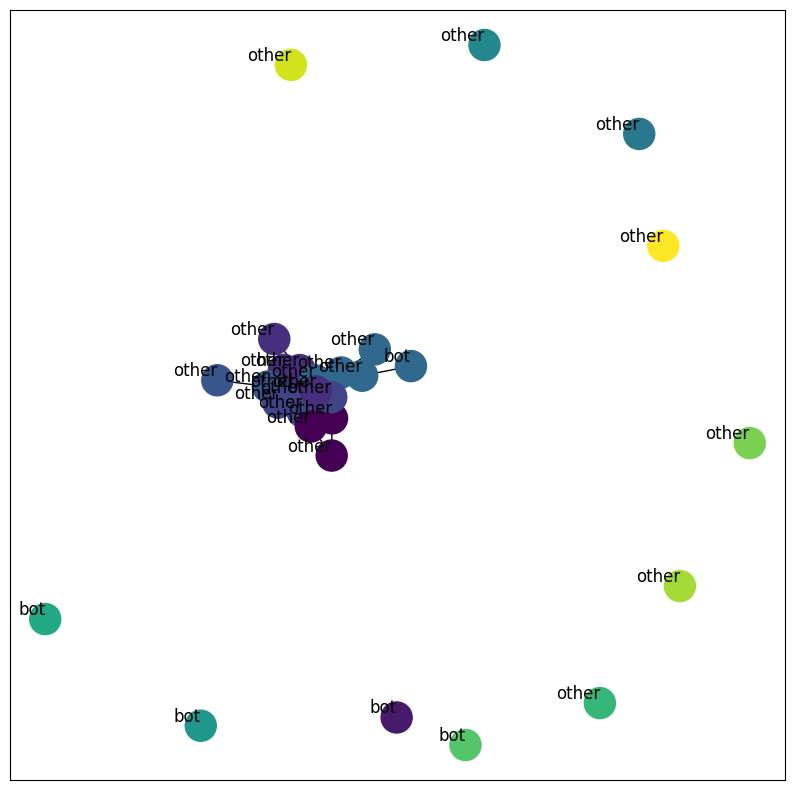

The modularity based on networkx is 0.16800567107750472


In [57]:
# Find the best partition of a graph using the Louvain Community Detection Algorithm

plt.figure(figsize=(10, 10))
#first compute the best partition
partition = community_louvain.best_partition(G_only_bots_without_low_degree)
bots_partition_nodes = {x:('bot' if x in bot_nodes_list else 'other') for (x, v) in partition.items()}

# draw the graph
pos = nx.spring_layout(G_only_bots_without_low_degree)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_labels(G_only_bots_without_low_degree, pos, labels=bots_partition_nodes, horizontalalignment='right',verticalalignment='bottom')
nx.draw_networkx_nodes(G_only_bots_without_low_degree, pos, partition.keys(), node_size=500,
                       cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G_only_bots_without_low_degree, pos)
plt.show()

cl_modularity = community_louvain.modularity(partition, G_only_bots_without_low_degree)
print("The modularity based on networkx is {}".format(cl_modularity))

We can notice that the <b>modularity measurement</b> is not so high, meaning that there's not necessarily an option to divide the bots group to inner separate groups, as they are all mixed up in the network.

Each time we run this code we'll get a different image of the graph. That's why we attach the following graph state, in order to emphasize the bots connections in the graph:

<div>
<img src="img/bots_best_partition.jpg" style="width: 500px; margin-top: 30px; margin-bottom: 30px;"/>
</div>

However, we do see that there're some connections between bots in our network and we can find them by searching on users with different parameters.

### NetworkX Analysis Summary

To sum up, we were able to identify what our network looks like and how it behaves but we were unable to extract a feature from the network that would help us analyze bots from a database. 

<b>Thus the method of analysis by networkX is not suitable for this project.</b>

### EDA Summary
Let’s conclude what we explored and learned from the data analysis we just did- 
We started with cleaning the data, and removing all the features we suspected as redundant. Then, we tried to analyze different data fields from our dataset. First we analyzed some textual features like users’ language and location and we even tried to categorize them into groups. After that, we started analyzing the numeric features (that also include boolean features which were converted to 0/1). We plotted the distribution of numeric features above the account type field and checked the correlation of the numeric features. We also analyzed other textual features like the tweets posts and hashtags using libraries like NLTK. 

So now - enough with the exploratory data analysis, we want to move forward to the next phase of our project - Classification.


# Classification

Based on what we analyzed and learned, and using python advanced libraries like `scikit-learn`, we will try to create and train a classifier which will get a twitter account with all of its features and return an estimation of whether this is a bot or a human account.

In order to do so, in some specific algorithms and in case we want to visualize the classification, we'll need to do some pre-work... 

## Dimensionality reduction

In [59]:
numeric_features.columns.size

11

As you can see, we have 11 numeric features, which we obviously can’t imagine or project on a visual axis at once.
In order to visualize this data and its classifier we’ll need to reduce the data dimensions.

**Dimensionality reduction** simply refers to the process of reducing the number of attributes in a dataset while keeping as much of the variation in the original dataset as possible. 

There are mainly two types of dimensionality reduction methods. Both methods reduce the number of dimensions but in different ways. 

- One type of method only keeps the most important features in the dataset and removes the redundant features. However we still not sure what are these attributes that are most important, so this method might cause an important data loss in our case in this stage of the research. 

- The other method finds a combination of new features. An appropriate transformation is applied to the set of features. The new set of features contains different values instead of the original values. And this method can be further divided into 2 sub-methods:
    - Linear methods. Foe example Principal Component Analysis (PCA).
    - Non-linear methods. Also well known as Manifold learning.
    
### Linear Dimensionality Reduction with PCA

In [61]:
features_norm = StandardScaler().fit_transform(numeric_features.dropna())

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf.head()

PC 1      PC 2
0 -0.629695 -0.110182
1 -0.635313 -0.104706
2 -0.414848  0.331856
3 -0.443404  0.826193
4  0.270488  1.993049

PC1 and PC2 are the 2 principal components that should reflect all 11 numeric features we had earlier as 2 features, while all the 11 original features should be reflected evenly through these 2 PCs.

In [62]:
df_pca = pd.concat([principalDf, classes], axis = 1)
df_pca

PC 1      PC 2 account_type
0     -0.629695 -0.110182          bot
1     -0.635313 -0.104706        human
2     -0.414848  0.331856        human
3     -0.443404  0.826193        human
4      0.270488  1.993049        human
...         ...       ...          ...
37433       NaN       NaN        human
37434       NaN       NaN        human
37435       NaN       NaN        human
37436       NaN       NaN        human
37437       NaN       NaN        human

[37438 rows x 3 columns]

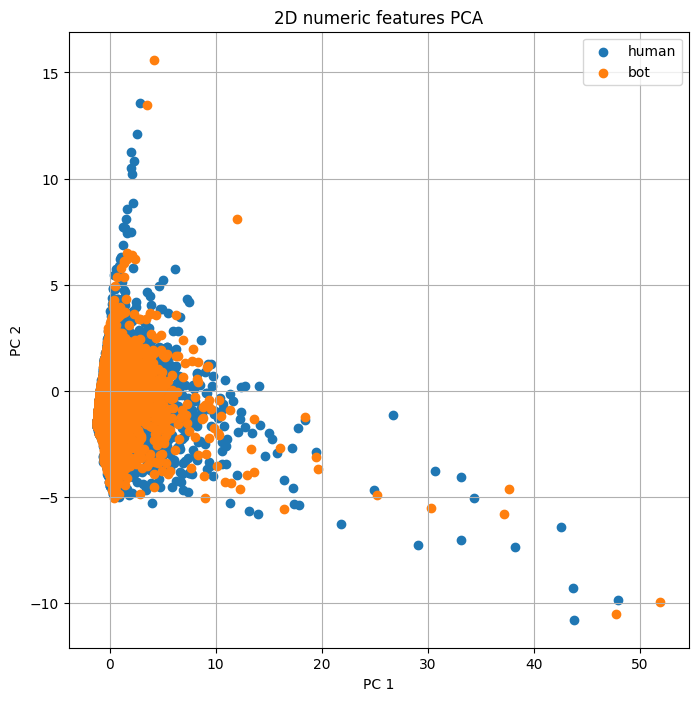

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('2D numeric features PCA')
targets = ['human', 'bot']
for target in targets:
    indicesToKeep = df_pca['account_type'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC 1'],
               df_pca.loc[indicesToKeep, 'PC 2'])
ax.legend(targets)
ax.grid()

Looks like PC1 and PC2 are pretty bad features. There's no actual classifier that can divide such a "messy" data, where all the bots and human points are mixed up and located in the same areas on the axis, without any clear separating guidlines.

And still we were curious about how, for example, the `K-nearest neighbours` algorithm will handle such a thing...

In [64]:
df_pca = df_pca.dropna()
df_pca.account_type = df_pca.account_type.astype('category').cat.codes
df_pca

PC 1      PC 2  account_type
0     -0.629695 -0.110182             0
1     -0.635313 -0.104706             1
2     -0.414848  0.331856             1
3     -0.443404  0.826193             1
4      0.270488  1.993049             1
...         ...       ...           ...
33322  1.410187  1.567277             1
33323  0.469964  1.291941             0
33324 -0.346739  0.944025             0
33325 -0.487664  0.905069             0
33326 -0.001321  0.951088             0

[33327 rows x 3 columns]

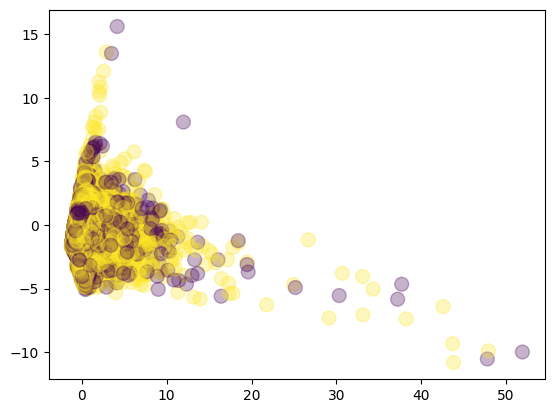

In [65]:
plt.scatter(df_pca["PC 1"], df_pca["PC 2"], c = df_pca.account_type, s=100, alpha=0.3)

In [66]:
df_pca_array = df_pca[["PC 1", "PC 2"]].to_numpy()

## Trying K-Nearest Neighbours after PCA

So using PCA (Principal Component Analysis) we reduced the data into 2 dimensions and reflected it on a graph.

Now let's try to create a classifier based on the 2 Principal Components that we just created. 

In [68]:
clf = neighbors.KNeighborsClassifier(10, weights='uniform')
clf.fit(df_pca_array, df_pca.account_type)

KNeighborsClassifier(n_neighbors=10)

(-11.806009663553603, 16.593990336445792)

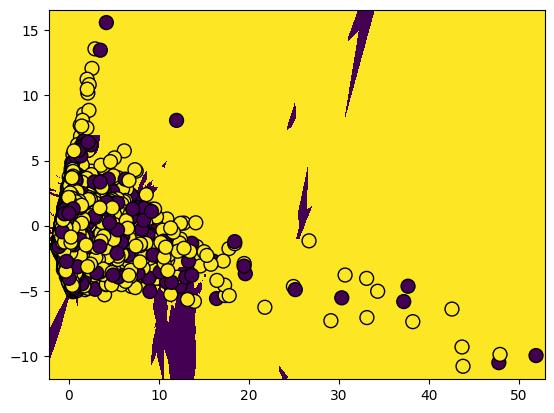

In [69]:
x_min, x_max = df_pca_array[:, 0].min() - 1, df_pca_array[:, 0].max() + 1
y_min, y_max = df_pca_array[:, 1].min() - 1, df_pca_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
 np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z)
plt.scatter(df_pca_array[:, 0], df_pca_array[:, 1], c=df_pca.account_type, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

It's pretty obvoius that the `K-nearest neighbours` algorithm didn't handle this data well, as the classifier it created is super overfitting and actually "circles" the data points according to their original classification, while these points are located above each other.

We decided to try a Non-Linear Classifier which might work better than the Liner method for dimensionality reduction in some cases. So we tried scikit-learn's Manifold method:

### Non-Linear Dimensionality Reduction with Manifold

We decided to try 2 non-linear manifold dimensionality reduction methods:
1. T-distributed Stochastic Neighbor Embedding (TSNE): Converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:
    * Revealing the structure at many scales on a single map
    * Revealing data that lie in multiple, different, manifolds or clusters
    * Reducing the tendency to crowd points together at the center.

2. LocallyLinearEmbedding: seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

Both of these methods took significantly less time than MDS for example.

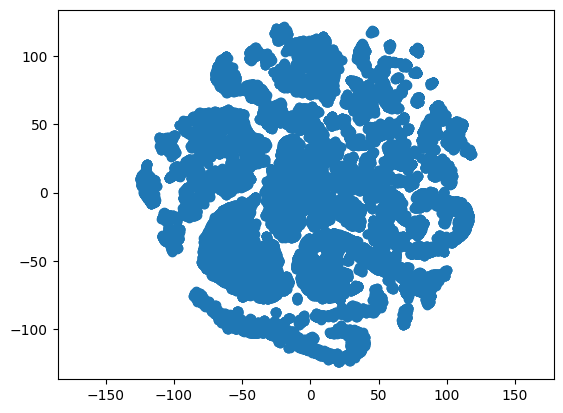

In [77]:
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_out = tsne_model.fit_transform(features_norm)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], cmap=plt.cm.Spectral)
plt.axis('equal');

In [79]:
df_tsne = pd.DataFrame(data = tsne_out, columns = ['TSNE 1', 'TSNE 2'])
df_tsne = pd.concat([df_tsne, classes], axis = 1)
df_tsne

TSNE 1     TSNE 2 account_type
0       6.626390 -89.507469          bot
1      89.833328  -3.513418        human
2     -41.697979  73.421249        human
3     -62.286255  90.814240        human
4     -55.961613  42.730778        human
...          ...        ...          ...
37433        NaN        NaN        human
37434        NaN        NaN        human
37435        NaN        NaN        human
37436        NaN        NaN        human
37437        NaN        NaN        human

[37438 rows x 3 columns]

<AxesSubplot:xlabel='TSNE 1', ylabel='TSNE 2'>

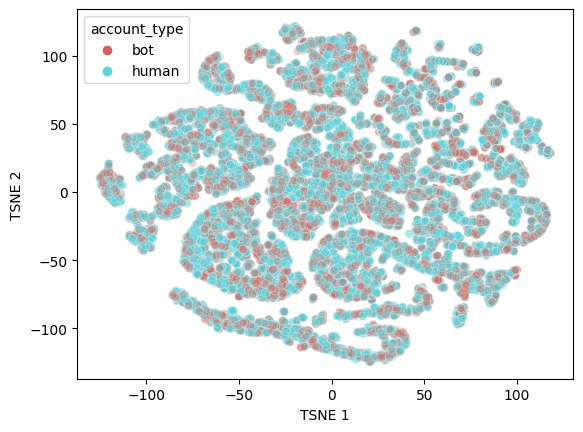

In [87]:
sns.scatterplot(
    x="TSNE 1", y="TSNE 2",
    hue="account_type",
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    legend="full",
    alpha=0.3
)

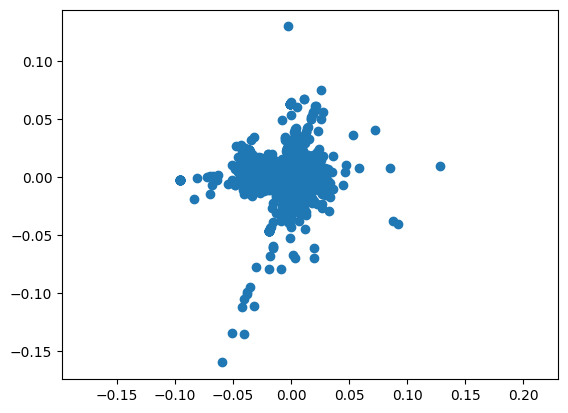

In [78]:
lle_model = LocallyLinearEmbedding(n_components=2)
lle_out = lle_model.fit_transform(features_norm)
plt.scatter(lle_out[:, 0], lle_out[:, 1], cmap=plt.cm.Spectral)
plt.axis('equal');

In [84]:
df_lle = pd.DataFrame(data = lle_out, columns = ['LLE 1', 'LLE 2'])
df_lle = pd.concat([df_lle, classes], axis = 1)
df_lle

LLE 1     LLE 2 account_type
0     -0.002048 -0.006362          bot
1     -0.001346 -0.001804        human
2     -0.000820 -0.001641        human
3     -0.000913 -0.001687        human
4     -0.000631 -0.000388        human
...         ...       ...          ...
37433       NaN       NaN        human
37434       NaN       NaN        human
37435       NaN       NaN        human
37436       NaN       NaN        human
37437       NaN       NaN        human

[37438 rows x 3 columns]

<AxesSubplot:xlabel='LLE 1', ylabel='LLE 2'>

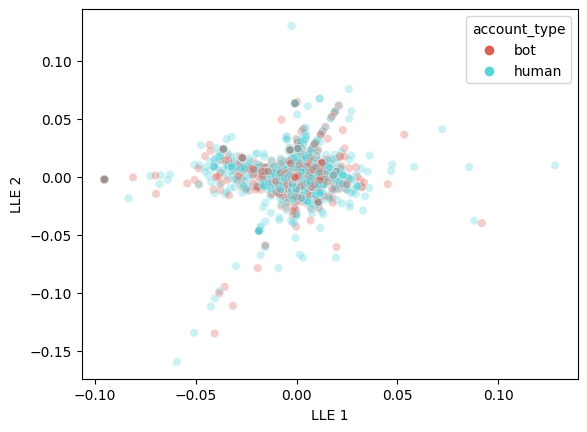

In [86]:
sns.scatterplot(
    x="LLE 1", y="LLE 2",
    hue="account_type",
    palette=sns.color_palette("hls", 2),
    data=df_lle,
    legend="full",
    alpha=0.3
)

As we can see on the visualized plots, TSNE and LocallyLinearEmbedding returned very different shapes and structures of data. But unfortunately, after attaching this data with the classes column we still can't see a good separation between the bot and human classes.

Although that, we still want to try and run some classification algorithms and see if we get so

### Train & Test Datasets
We’ll now split the dataset into two sets: random training and testing subsets using sklearn library.
Then, we'll train our modeld using the training set and test these models using the testing set.

The test subset will be 25% from the original dataset, while the trainging will be performed on the rest 75%.

In [77]:
users_df_without_nans = users_df.dropna()
X = users_df_without_nans[numeric_features_names]
y = users_df_without_nans['account_type']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [78]:
users_df_without_nans[numeric_features_names]

favourites_count  followers_count  following_count  tweets_count  \
1                  1038               60              128           259   
4                 20866            74448               18         15870   
10                  231          5092571               21          1848   
12                 2703              498              522          5614   
19                   40             8662                0         26778   
...                 ...              ...              ...           ...   
37425               218           129757              152          1332   
37428                23               37                0          1407   
37429              8768              367              321         30712   
37432                78         43830557             1808         66893   
37433             59660           257294              196         58680   

       average_tweets_per_day  account_age_days  \
1                       0.067              3866   
4                       4.116              3856   
10                      0.505              3658   
12                      1.444              3887   
19                     10.124              2645   
...                       ...               ...   
37425                   0.433              3075   
37428                   0.343              4099   
37429                  10.231              3002   
37432                  17.857              3746   
37433                  16.562              3543   

       less_than_one_min_deltas_count  geo_enabled  verified  \
1                                 1.0            0         0   
4                                 0.0            1         1   
10                                1.0            1         1   
12                                0.0            0         0   
19                                5.0            0         0   
...                               ...          ...       ...   
37425                             0.0            0         1   
37428                             8.0            0         0   
37429                             3.0            0         0   
37432                             1.0            1         1   
37433                             1.0            1         1   

       posts_constant_deltas  lang  reputation  
1                        0.0     9    0.319149  
4                        0.0    10    0.999758  
10                       0.0    42    0.999996  
12                       0.0     9    0.488235  
19                       0.0     9    1.000000  
...                      ...   ...         ...  
37425                    0.0    41    0.998830  
37428                    0.0     9    1.000000  
37429                    0.0    20    0.533430  
37432                    0.0    16    0.999959  
37433                    0.0     9    0.999239  

[14395 rows x 12 columns]

### Standard Scaling
Some algorithms need scaling the features into a same scale while some others (e.g. tree based algorithms) are invariant to it. This process is called Feature Scaling and we already have done that while running PCA and graphing the violin plot. So now we'll use the StandardScaler again.

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_orig)
X_test = sc.transform(X_test_orig)

Now, our dataset is ready to be used by different classifiers.

# Classification Algorithms

Before deep diving into different classification algorithms, we want to understand how we'll measure and compare their performances.

For each algorithm, we'll train the corresponding model. After fitting (training) the algorithm on the training set, we'll predict the classification for the test set and compare the result to the actual classification (y_test).

We'll have 2 main measurements:
1. **Accuracy score**: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observations to the total observations. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0 .
2. **Confusion matrix**: Also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class (y_test) while each column represents the instances in a predicted class.

So let's start running different classification algorithms and models that sklearn provides us...

## 1. Logistic Regression
Logistic Regression is a classification algorithm created based on the logistic function — Sigmoid activation function to convert the outcome into categorical value. This function produces a S-shaped curve which takes any number as input and produces an output in-between 0 and 1.

Training the Logistic Regression model on the training set:

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting the test set results:

In [82]:
y_pred_lr = lr.predict(X_test)

Creating a confusion matrix and calculating accuracy score:

accuracy score: 0.7571547652125591
confusion matrix:


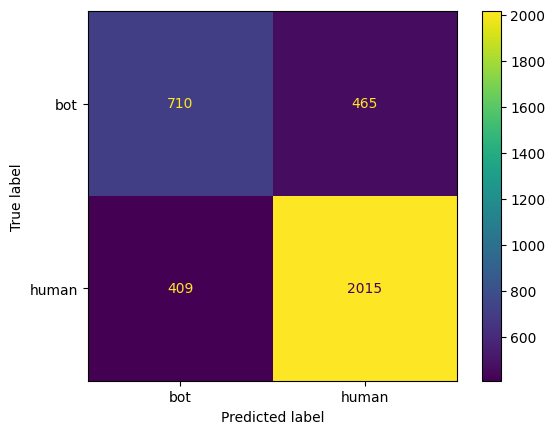

In [83]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"accuracy score: {acc_lr}")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp.plot()
plt.show()

As we can see, the trained logistic regression model was predicting the account type of the test set accurately in 75.74% . And from the confusion matrix we can learn the following:

- Out of 1,175 real bots, the algorithm correctly identified 710 as bots and the other 465 as humans.
- Out of 2,424 real humans, the algorithm incorrectly identified 408 as bots and the other 2016 as humans.

Note! these numbers, and the also the following algorithm's results, are based on a specific run, but it can vary a little between different runs because the splitting into training and test sets is done randomly.


## 2. K-Nearest Neighbours (K-NN)

KNN model is very compute intensive for larger datasets, that's why we tried (but not really succeed) to run K-Nearest Neighbours after dimensionality reduction, we'll now try to run this learning algorithm on the original features. 

This model calculates the class membership of the dependent variable by calculating distance with its k nearest neighbors. We have chosen to go with 5 neighbours, and we'll use minkowski as a fast distance metric function (a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance).

accuracy score: 0.7641011392053348
confusion matrix:


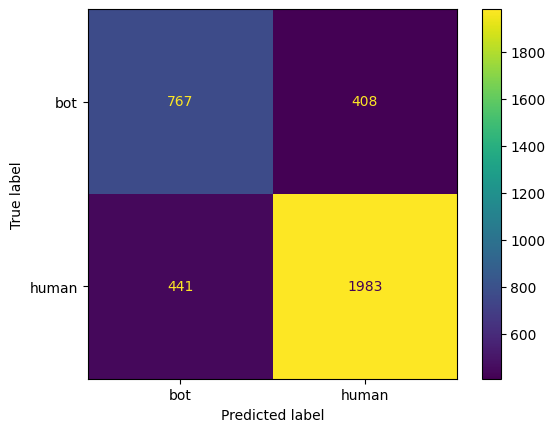

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"accuracy score: {acc_knn}")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f"confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()
plt.show()

As we can see, the trained knn model was predicting the account type of the test set accurately in 76.52% . And from the confusion matrix we can learn the following:

- Out of 1,175 real bots, the algorithm correctly identified 747 as bots and the other 428 as humans.
- Out of 2,424 real humans, the algorithm incorrectly identified 417 as bots and the other 2007 as humans.


## 3. SVC (Support Vector Classifier) with Linear Kernel
This model returns a best-fit hyperplane that divides the input data. This assumes that the data is linearly separable, which theoretically should be possible as there are 2 categories (human/bot).

accuracy score: 0.7357599333148097
confusion matrix:


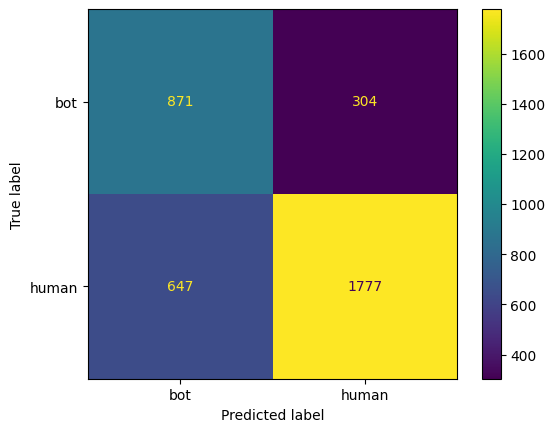

In [85]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"accuracy score: {acc_svc}")
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(f"confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc.classes_)
disp.plot()
plt.show()

As we can see, the trained svc model was predicting the account type of the test set accurately in 73.54% . And from the confusion matrix we can learn the following:

- Out of 1,175 real bots, the algorithm correctly identified 871 as bots and the other 304 as humans.
- Out of 2,424 real humans, the algorithm incorrectly identified 648 as bots and the other 1776 as humans.

## 4. Naive Bayes
Naive Bayes is actually a collection of classification algorithms based on Bayes’ Theorem with strong (naive) independence assumptions between the features.
They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve high accuracy levels.

accuracy score: 0.7068630175048625
confusion matrix:


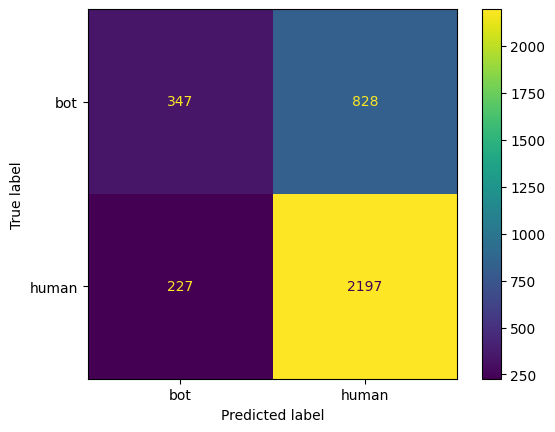

In [86]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred)
print(f"accuracy score: {acc_nb}")
cm_nb = confusion_matrix(y_test, y_pred)
print(f"confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp.plot()
plt.show()

As we can see, the trained naive bayes model was predicting the account type of the test set accurately in 70.63% . And from the confusion matrix we can learn the following:

- Out of 1,175 real bots, the algorithm correctly identified 382 as bots and the other 793 as humans.
- Out of 2,424 real humans, the algorithm incorrectly identified 264 as bots and the other 2160 as humans.


## 5. Decision Tree
A decision tree is a series of if-then-else rules learned from the data for classification or regression tasks. Decision trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Decision trees have some advantages compared to previous algorithms we saw, one of the most significant advantsges is that trees are simple to understand and to interpret. Trees can be visualized (as we will also see in the following run!).

They also require little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed, and that's why we'll use here the original data before the normalization (X_train**_orig** , X_test_**orig**).

However, one of the disadvantages are that Decision-tree learners can create over-complex trees that do not generalize the data well (overfitting). Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Let's see the performance of decision tree on our data:

accuracy score: 0.8099472075576549
confusion matrix:


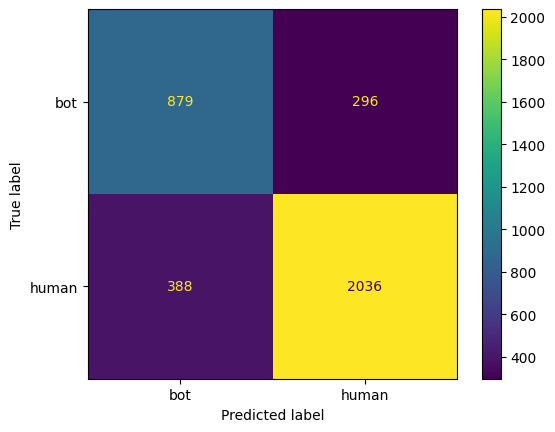

In [87]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_orig, y_train)

y_pred = dt.predict(X_test_orig)

acc_dt = accuracy_score(y_test, y_pred)
print(f"accuracy score: {acc_dt}")
cm_dt = confusion_matrix(y_test, y_pred)
print(f"confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp.plot()
plt.show()

As we can see, the trained decision tree model was predicting the account type of the test set accurately in 80.74% . And from the confusion matrix we can learn the following:

- Out of 1,175 real bots, the algorithm correctly identified 877 as bots and the other 298 as humans.
- Out of 2,424 real humans, the algorithm incorrectly identified 395 as bots and the other 2029 as humans.

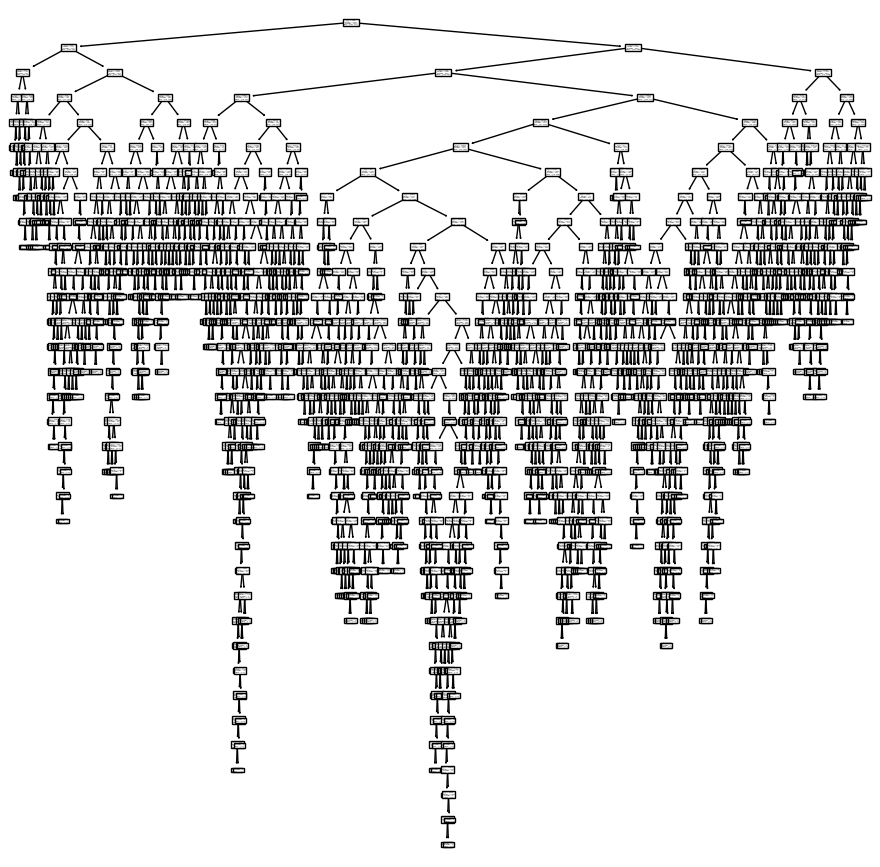

In [88]:
fig = plt.figure(figsize=(11, 11))
tree.plot_tree(dt)
plt.show()

In [89]:
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of tree's leaves: {dt.get_n_leaves()}")

Tree depth: 33
Number of tree's leaves: 1141


This tree is obviously very complicated, but it is still readable and we can get the actual "behind the scenes" path calculation which is pretty cool (using decision_path function :)

## 6. Random Forest
Random Forest is an ensemble of Decision Trees by taking various sub-samples of the dataset and uses averaging or majority voting to improve the predictive accuracy. It’s based on the concept that, averaging/voting predictions from different models will be more robust than a prediction of any individual model.

accuracy score: 0.7954987496526813
confusion matrix:


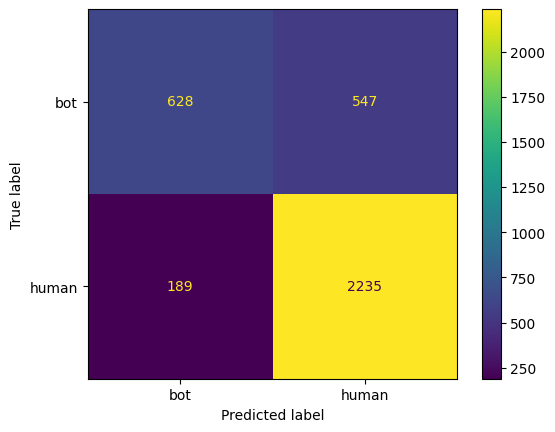

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)  # max_depth: the maximum depth of the tree.
rf.fit(X_train_orig, y_train)

y_pred_rf = rf.predict(X_test_orig)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"accuracy score: {acc_rf}")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot()
plt.show()

As we can see, the trained random forest model was predicting the account type of the test set accurately in 78.77% . And from the confusion matrix we can learn the following:

- Out of 1,175 real bots, the algorithm correctly identified 676 as bots and the other 499 as humans.
- Out of 2,424 real humans, the algorithm incorrectly identified 265 as bots and the other 2159 as humans.

# Explaining the decision tree model with SHAP
Explainable AI (XAI) helps build trust and confidence in machine learning models by making them more transparent. XAI is a set of tools and frameworks that can be used to understand and interpret how a machine learning model makes decisions. One useful XAI tool is the SHAP library in Python. This tool allows us to quantify features’ contribution towards a single prediction as well as predictions at an overall level. The library also comes with aesthetically pleasing easy-to-use visualizations. 

After running the different classification algorithms using sklearn, we'll try to go further than just presenting their accuracies and confusion matrices, by applying some SHAP’s interesting analyzing tools...

In [91]:
import shap
shap.initjs() # load JS visualization code to notebook

/Users/orlysk/Documents/TwitterBotsProject/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now let's run the SHAP explainer on our decision tree trained model (dt), which had the best perfomance values and the highest accuracy from all of our trained models:

In [92]:
explainer = shap.TreeExplainer(dt)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test_orig)[0]

print(f"Shap values length: {len(shap_values)}")
print(f"First sample of shap_values: {shap_values[0]}")
print(f"expected_value: {expected_value}")

Shap values length: 3599
First sample of shap_values: [ 0.36751405 -0.0536348  -0.00836338 -0.02684149 -0.05533682  0.22954269
  0.00422733  0.02062684  0.14006992 -0.0016675  -0.00390014  0.04680369]
expected_value: [0.34095961 0.65904039]


SHAP's explainer contains few intersting attributes. Let’s understand what each one of these attributes shows us:

1. **expected_value** : also known as the base value, is the average target value in the training data, or the mean of the raw model predictions for the training set.
2. **shap_values** : the most important attribute here. If we add these shap values to the expected value, we will get the prediction with a prticular calculation.

We can also see that there are 3599 shap values, the same length as the X_test length with the original samples.

Let’s convert the shap values into a DataFrame for easier manipulation:

In [104]:
shap_df = pd.DataFrame(shap_values, 
                       columns=X_test_orig.columns, 
                       index=X_test_orig.index)
shap_df

favourites_count  followers_count  following_count  tweets_count  \
18241          0.367514        -0.053635        -0.008363     -0.026841   
25578         -0.079413        -0.084816        -0.097483     -0.019888   
1206          -0.221493         0.255846         0.049854     -0.278858   
33065         -0.019406        -0.148178        -0.021903      0.006937   
31327          0.120969        -0.052265         0.243353      0.130166   
...                 ...              ...              ...           ...   
5350           0.108084         0.590380        -0.036530     -0.016463   
17030         -0.120310        -0.085146         0.140016     -0.031033   
15201         -0.069088        -0.098395        -0.076502     -0.063881   
29316         -0.041551        -0.091721        -0.051472     -0.011416   
9138           0.005431        -0.006383         0.299232      0.048853   

       average_tweets_per_day  account_age_days  \
18241               -0.055337          0.229543   
25578                0.038146         -0.072559   
1206                -0.030441         -0.094274   
33065               -0.035111         -0.013546   
31327               -0.092935          0.236636   
...                       ...               ...   
5350                -0.037129          0.022725   
17030               -0.077618         -0.214431   
15201               -0.023028         -0.001753   
29316               -0.014921         -0.008504   
9138                -0.002876         -0.034590   

       less_than_one_min_deltas_count  geo_enabled  verified  \
18241                        0.004227     0.020627  0.140070   
25578                       -0.006300     0.001850  0.043111   
1206                        -0.003848    -0.012064  0.032660   
33065                       -0.003600     0.003863 -0.088663   
31327                       -0.003754    -0.066913  0.136507   
...                               ...          ...       ...   
5350                        -0.001218     0.003596  0.023598   
17030                        0.010471     0.006037  0.059744   
15201                       -0.003637     0.007047  0.046952   
29316                       -0.002780    -0.006994 -0.082500   
9138                         0.043297     0.003414  0.117801   

       posts_constant_deltas      lang  reputation  
18241              -0.001667 -0.003900    0.046804  
25578              -0.000805 -0.003568   -0.059235  
1206               -0.001966 -0.005570   -0.030805  
33065              -0.000829 -0.001933   -0.018591  
31327              -0.000989 -0.003295    0.011561  
...                      ...       ...         ...  
5350               -0.002550  0.000484    0.004065  
17030              -0.001740 -0.004591   -0.022360  
15201              -0.000546 -0.036787   -0.021341  
29316              -0.000294 -0.002673   -0.026135  
9138               -0.002712  0.205619   -0.018045  

[3599 rows x 12 columns]

Now, we have the shap values, we can do custom visualisations like this one to understand the feature contribution:

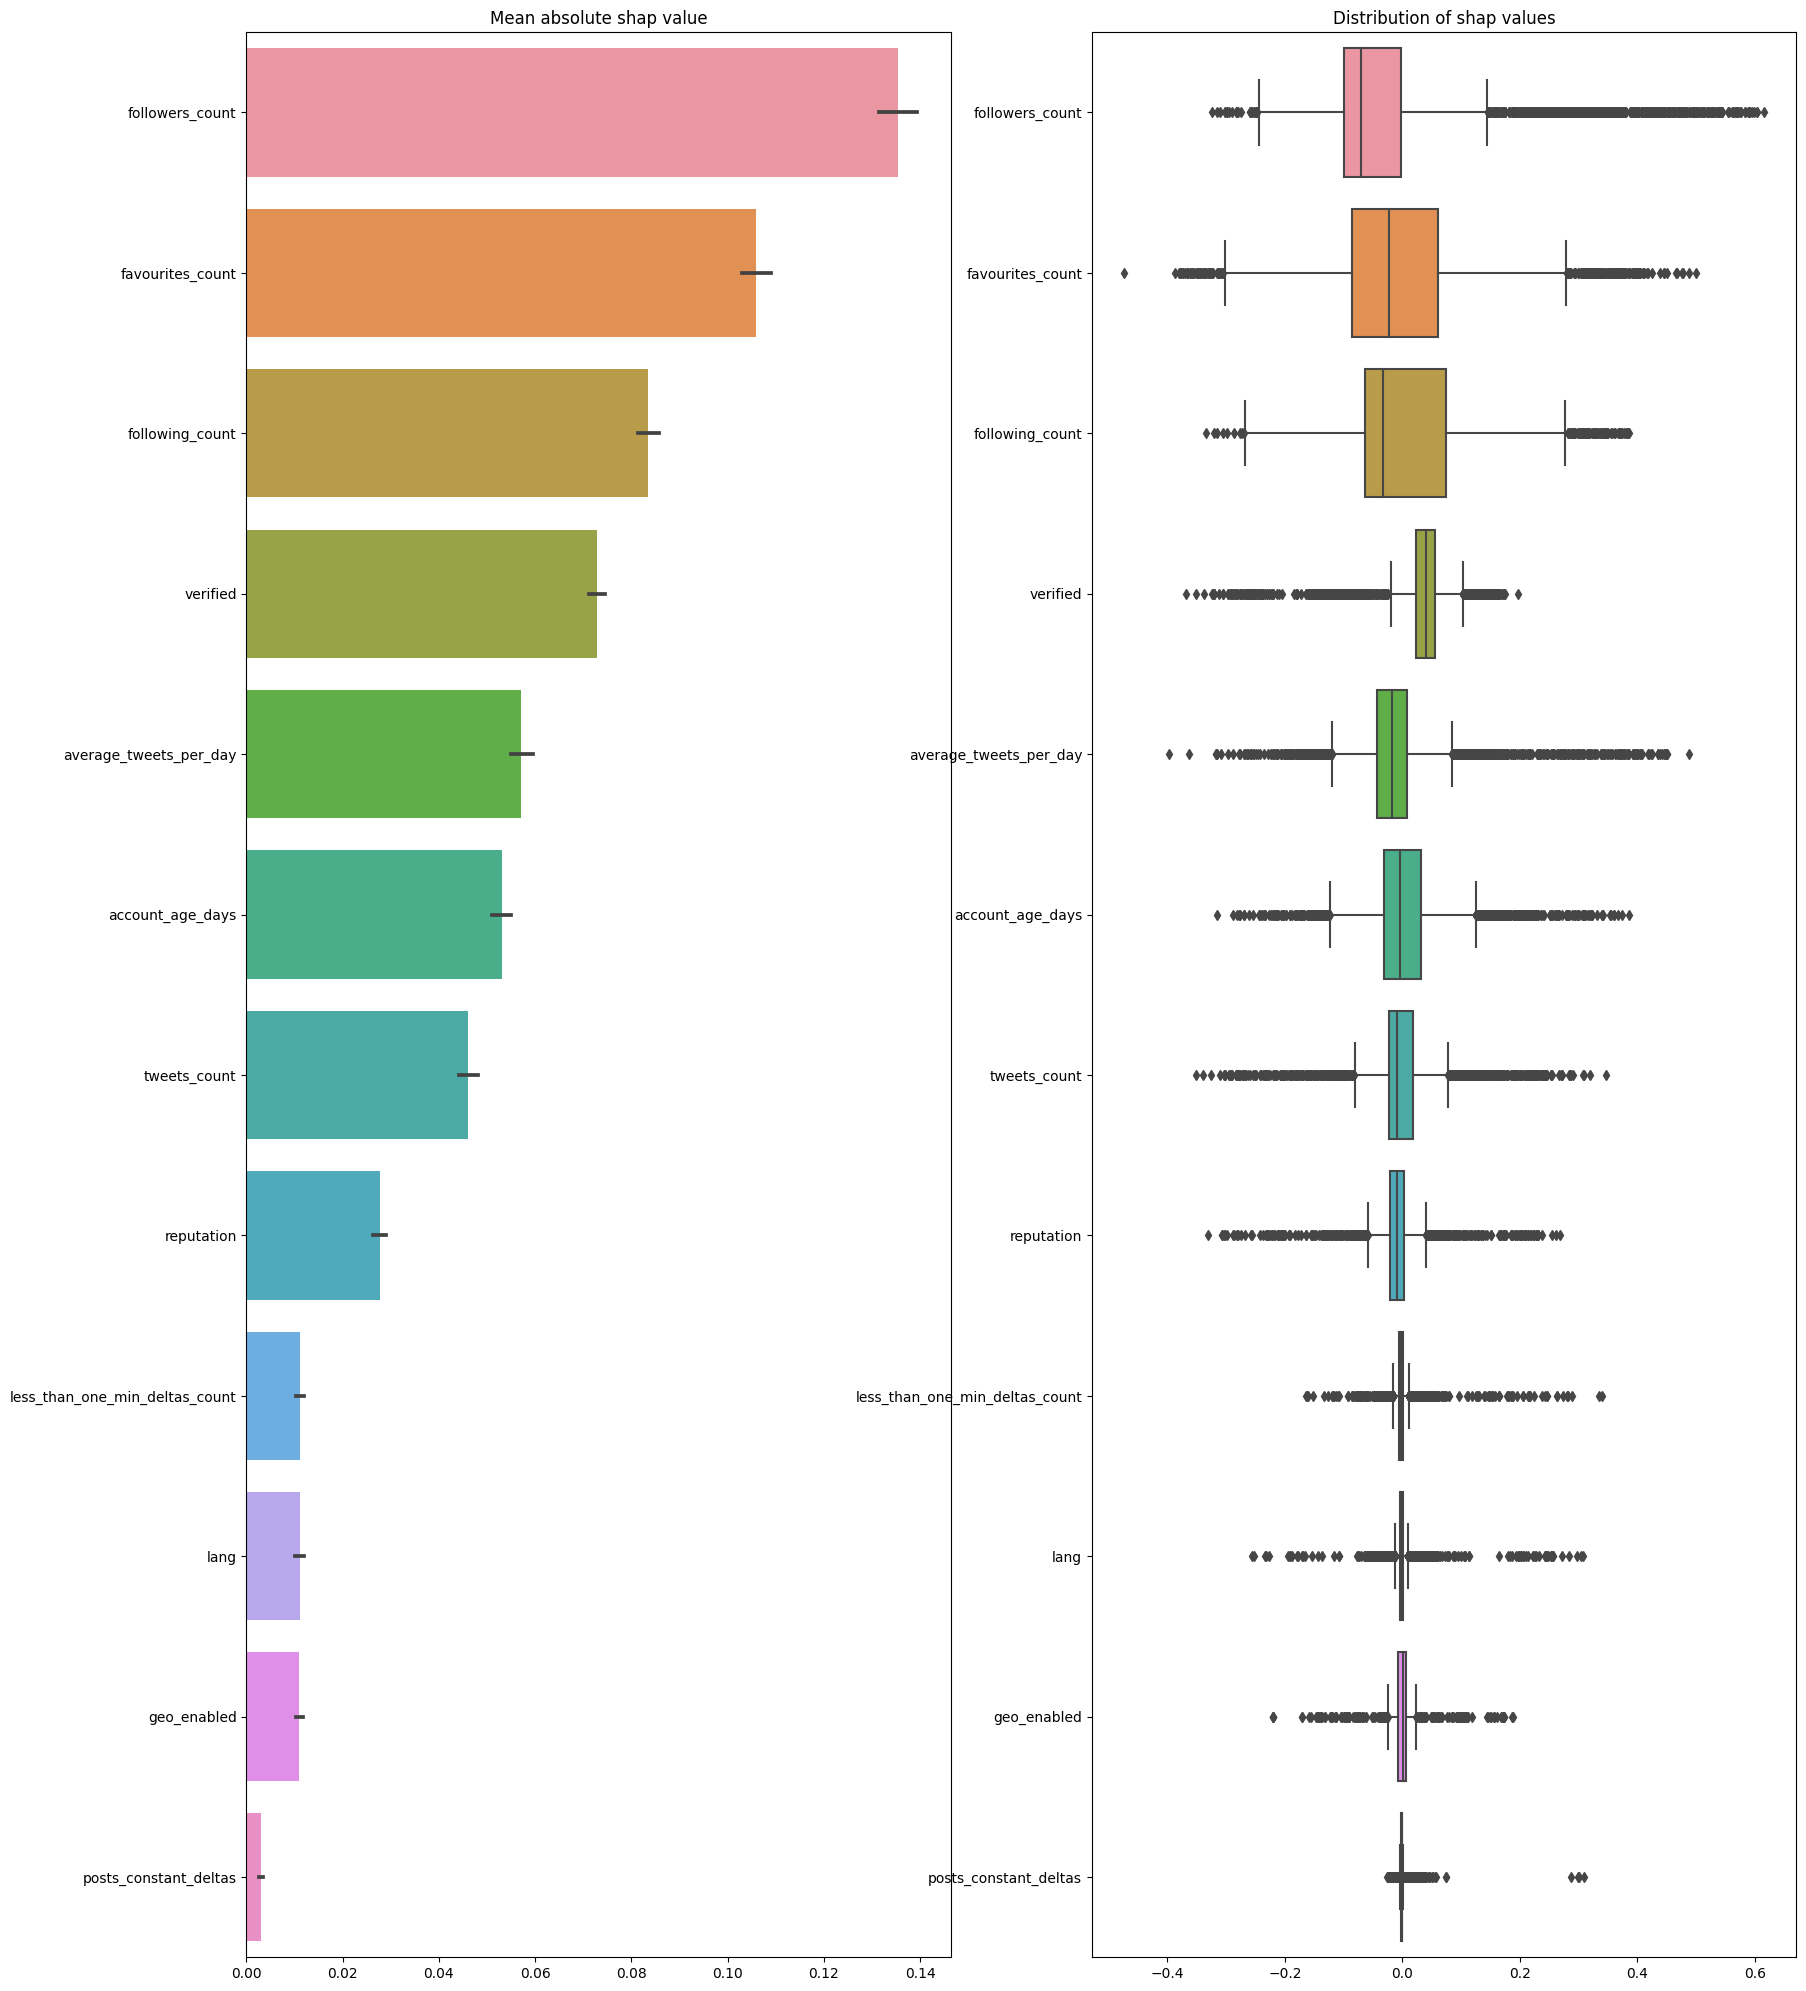

In [105]:
columns = shap_df.apply(np.abs).mean().sort_values(ascending=False).index
fig, ax = plt.subplots(1, 2, figsize=(20,25))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

The left subplot shows the mean absolute shap value for each feature whereas the right subplot shows the distribution of the shap values by feature. One takeaway from these graphs is that `followers_count` has the biggest contribution among the features being used.

Another useful plot is summary plot:

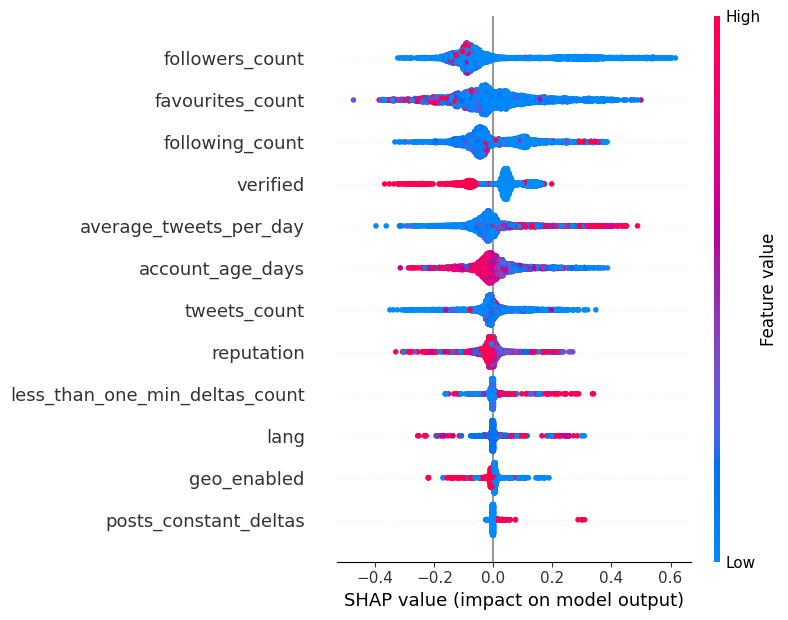

In [106]:
shap.summary_plot(shap_values, X_test_orig)

In this plot, features are sorted by their mean absolute shap value. The horizontal axis of the plot shows the shap value distribution of a feature. Each dot represents a record in the dataset. For instance, we can see that for most of our features the dots are clustered and centralized in specific areas on the axis. The `reputation` dots for example are clustered closer to 0, while the `favourites_count` dots are more scattered around and lower than 0.

The colour of dots shows the feature values. This addition dimension allows us to see how the shap values change as the feature value changes. In other words, we can see the direction of the relationship. For instance, we can see that shap value tend to be higher when `average_tweets_per_day` is high (represented by hot pink dots) and lower when `average_tweets_per_day` is low (represented by blue dots). There are also some purple points scattered across the spectrum as well.

We can see the opposite relation happens for the `account_age_days` feature.

And there are different plot types we can use for the summary_plot, like 'violin' for example:

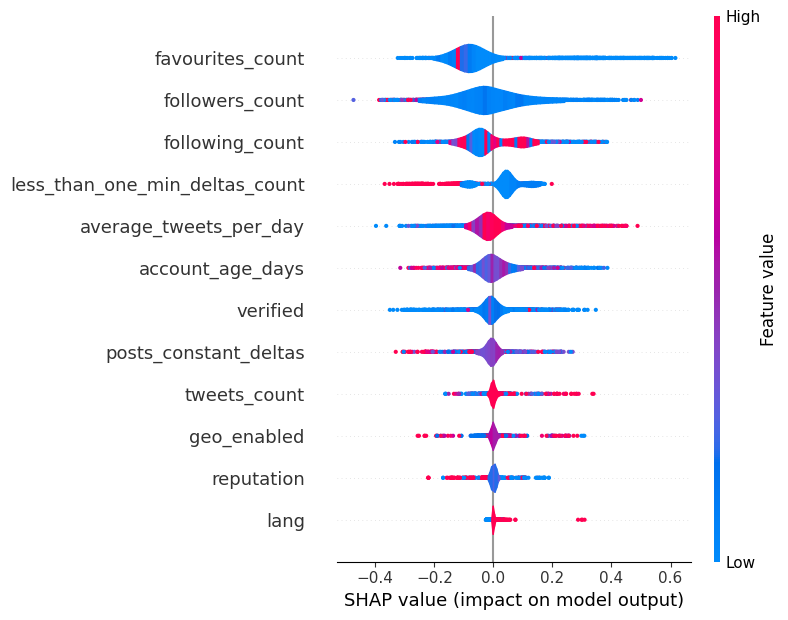

In [107]:
shap.summary_plot(shap_values, X_test_orig, plot_type='violin', feature_names=columns.tolist())

There's another cool (but not so useful) plot called `decision_plot` , we can use for showing how complex models arrive at their predictions. So if we'll take our model for example, we can see how the decision for the first 10 samples was made.

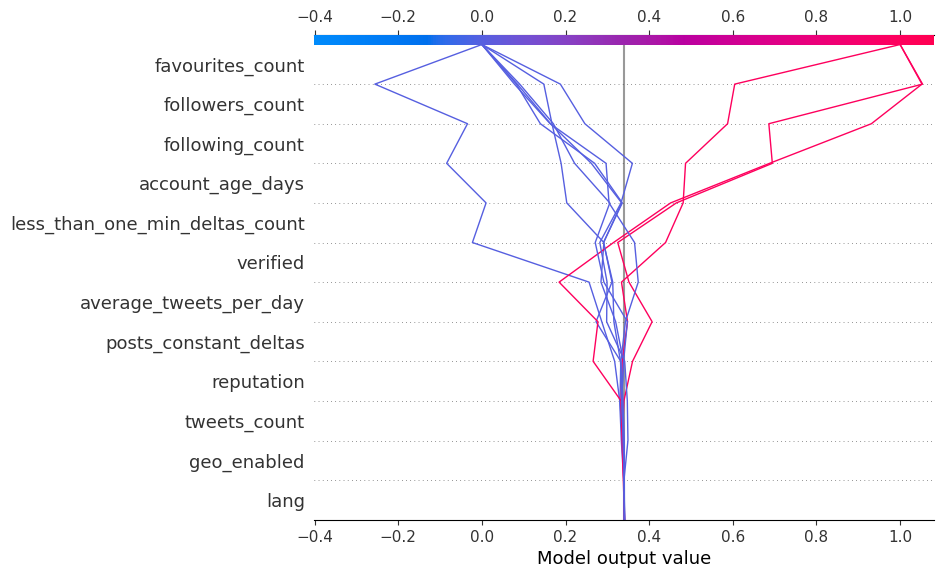

In [109]:
shap.decision_plot(explainer.expected_value[0], shap_values[:10], feature_names=columns.tolist())

# Conclusion and further research 

While writing the project, we realized that we had taken on a project that is bothering the masses in the world. There are quite a few solutions for identifying bots, but not all of them provide a reliable solution. For example the following site is trying to give a prediction to some existing bot followers to the user, the site is unreliable.
<div>
<img src="img/benyamin_bots.jpeg" style="width: 300px; margin-top: 30px; margin-bottom: 30px;"/>
</div>
That is, it is not certain that we will be able to give parameters for identifying bots, but we will be able to characterize some of them.

Identifying bots is not easy and even when Twitter has unveiled its API it does not give access to all the data, and some of the data can be written by the users, so it is not always possible to rely on them all.

At the final project we wiil try to identify the parameters for identify bots.
* We will try to get some grade for user by all parameters and by this grade maybe identify bots. 
* We will take database without classification of bots or scrapped it alone, and try to find bots by all our EDA.

Another ideas for features and data we could study from:
* Mention and Text tweets analyze
    We could try to take the texts of the users and analyze from them words that repeat? maybe we can get some data out of it that will help catalog a bot. Are the tweets repetitive? 
* User name analyze - Bots are usually written in random letters so we could try to identify them by their names maybe?
* reading more article about twitter bots and find more ideas for patameters. for ex (https://towardsdatascience.com/python-detecting-twitter-bots-with-graphs-and-machine-learning-41269205ab07 )